## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [2]:
# To have proper visibility of all columns and rows setting these options
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share, fraud_share )

99.82725143693798 0.1727485630620034


So we see that 99.83 % of data are not fraud, and 0.173% of data is fraud. SO there is high amount of imbalance in data.

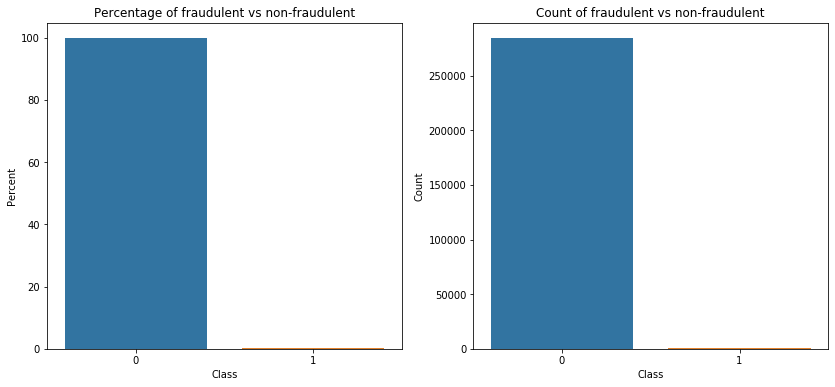

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.barplot(x="Class", y="Class", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Percentage of fraudulent vs non-fraudulent')

plt.subplot(122)
ax = sns.barplot(x="Class", y="Class", data=df, estimator=lambda x: len(x))
ax.set(ylabel="Count")
plt.title('Count of fraudulent vs non-fraudulent')
plt.show()


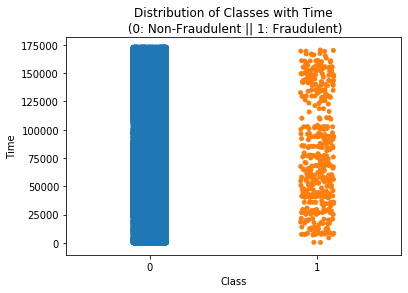

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()


We see that Time does not have any influence on Fraudulent vs Non-Fraudulent transactions. Frauds have happened across all times.

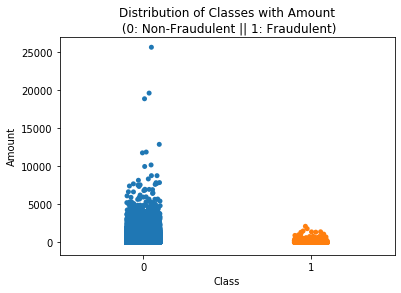

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

We see at lower amounts, the frequency of Fraudulent transactions are more, and it does not go beyond around 2500 amount. So we can assume that Fraudulent transactions are more probable at lower amounts.

In [10]:
# We also do a correlation check of the Class with the various variables
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

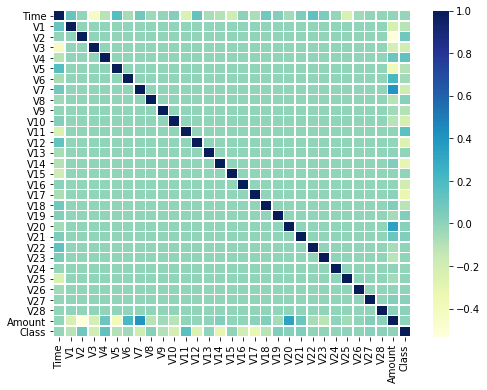

In [11]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

We dont see any high correlation for any of the columns with Class, and no correlation among themselves too as it is PCA data.
Some fields like V2, V4, V10, have a slightly high correlation than others.

In [12]:
# Drop unnecessary columns
# We drop the Time column, as earlier we see that Class does not have any dependancy on Time.

df = df.drop('Time', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [13]:
# We split the data into X and y, where y is the "CLass", and X is the remaining variables.
y= df['Class'] #class variable
X = df.iloc[:,:-1]

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Since the data is highly imbalanced, so to maintain the distribution/proportion of data equaly in both test and train, we use stratification.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print("Count of Fraudulent Transactions in all data - ", np.sum(y))
print("Count of Fraudulent Transactions in Train data - ", np.sum(y_train))
print("Count of Fraudulent Transactions in Test data - ", np.sum(y_test))

Count of Fraudulent Transactions in all data -  492
Count of Fraudulent Transactions in Train data -  394
Count of Fraudulent Transactions in Test data -  98


So we see that the proportion of y (Class) value is almost qually distributed.

C:\Users\Sucharita\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  import sys


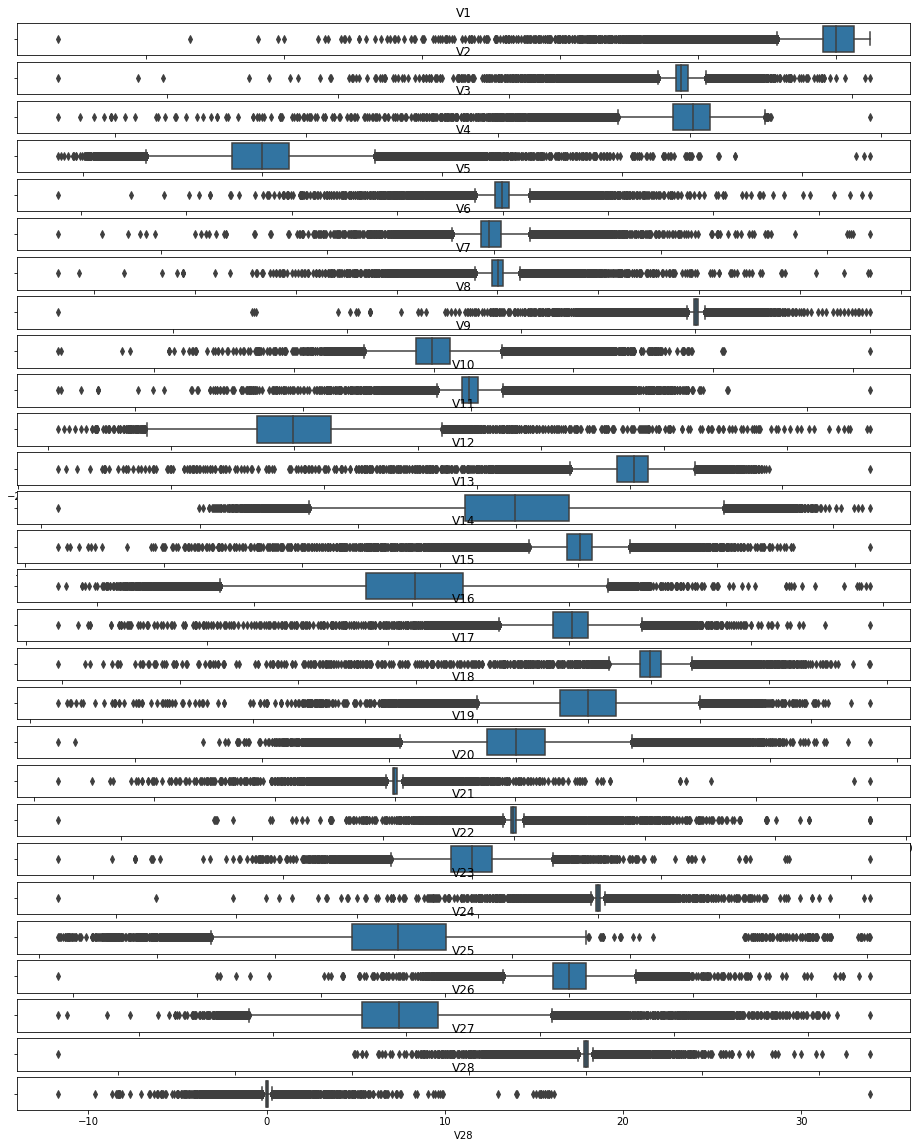

In [18]:
# generic function to plot box plots to view presence of outliers.
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols)-1, figsize=(16,20))
    for i in range(0,len(cols)-1):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
cols = X_train.columns    
check_outliers_continuous(X_train, cols)

We do see outliers are present in most variables, but eliminating them would lose a lot of data, so we keep them as is.

### Plotting the distribution of a variable

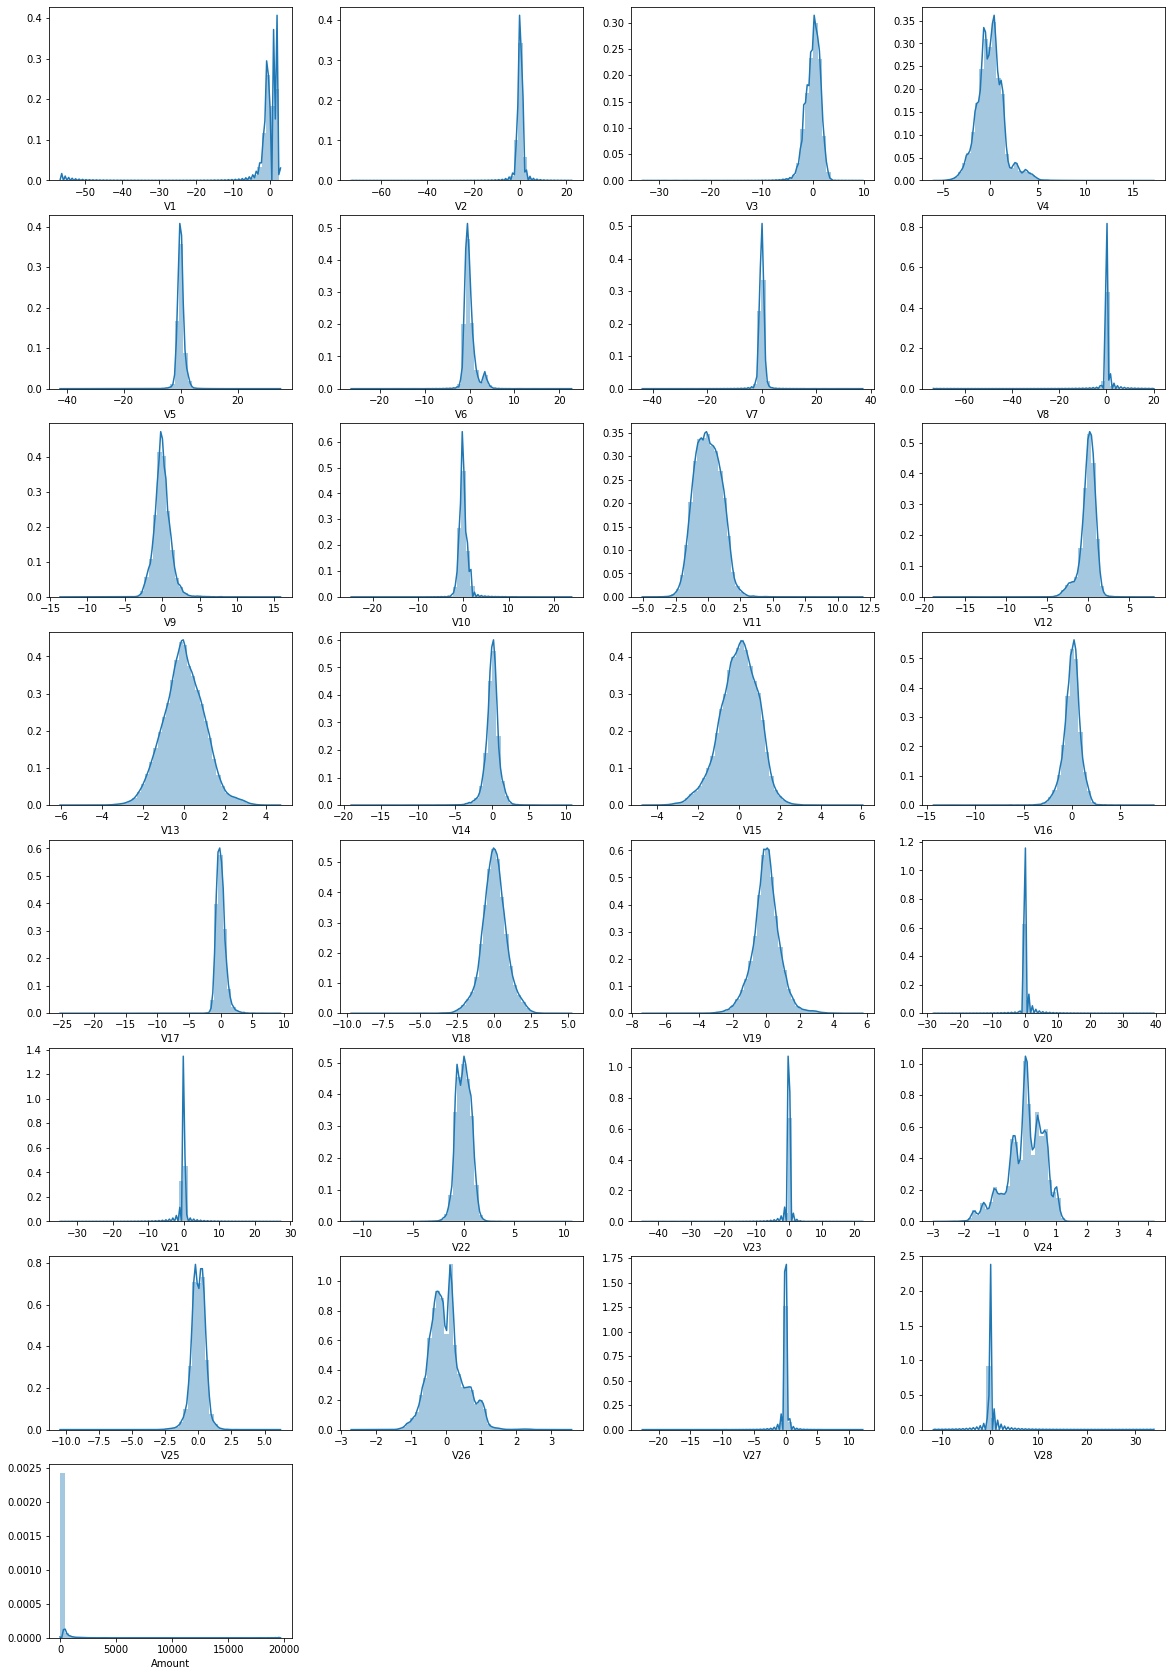

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,30))
m = 1
for i in X_train.columns:
    plt.subplot(8,4,m)
    sns.distplot(X_train[i])
    m +=1
plt.show()

For some of the columns we do see skewness in the data, like in V20, V24, Amount fields. So we need to apply some kind of transform.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# We use yeo-johnson method of power transform since it works both with positive and negative values.

from sklearn.preprocessing import power_transform
X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [21]:
# Converting X_train & X_test back to dataframe
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols

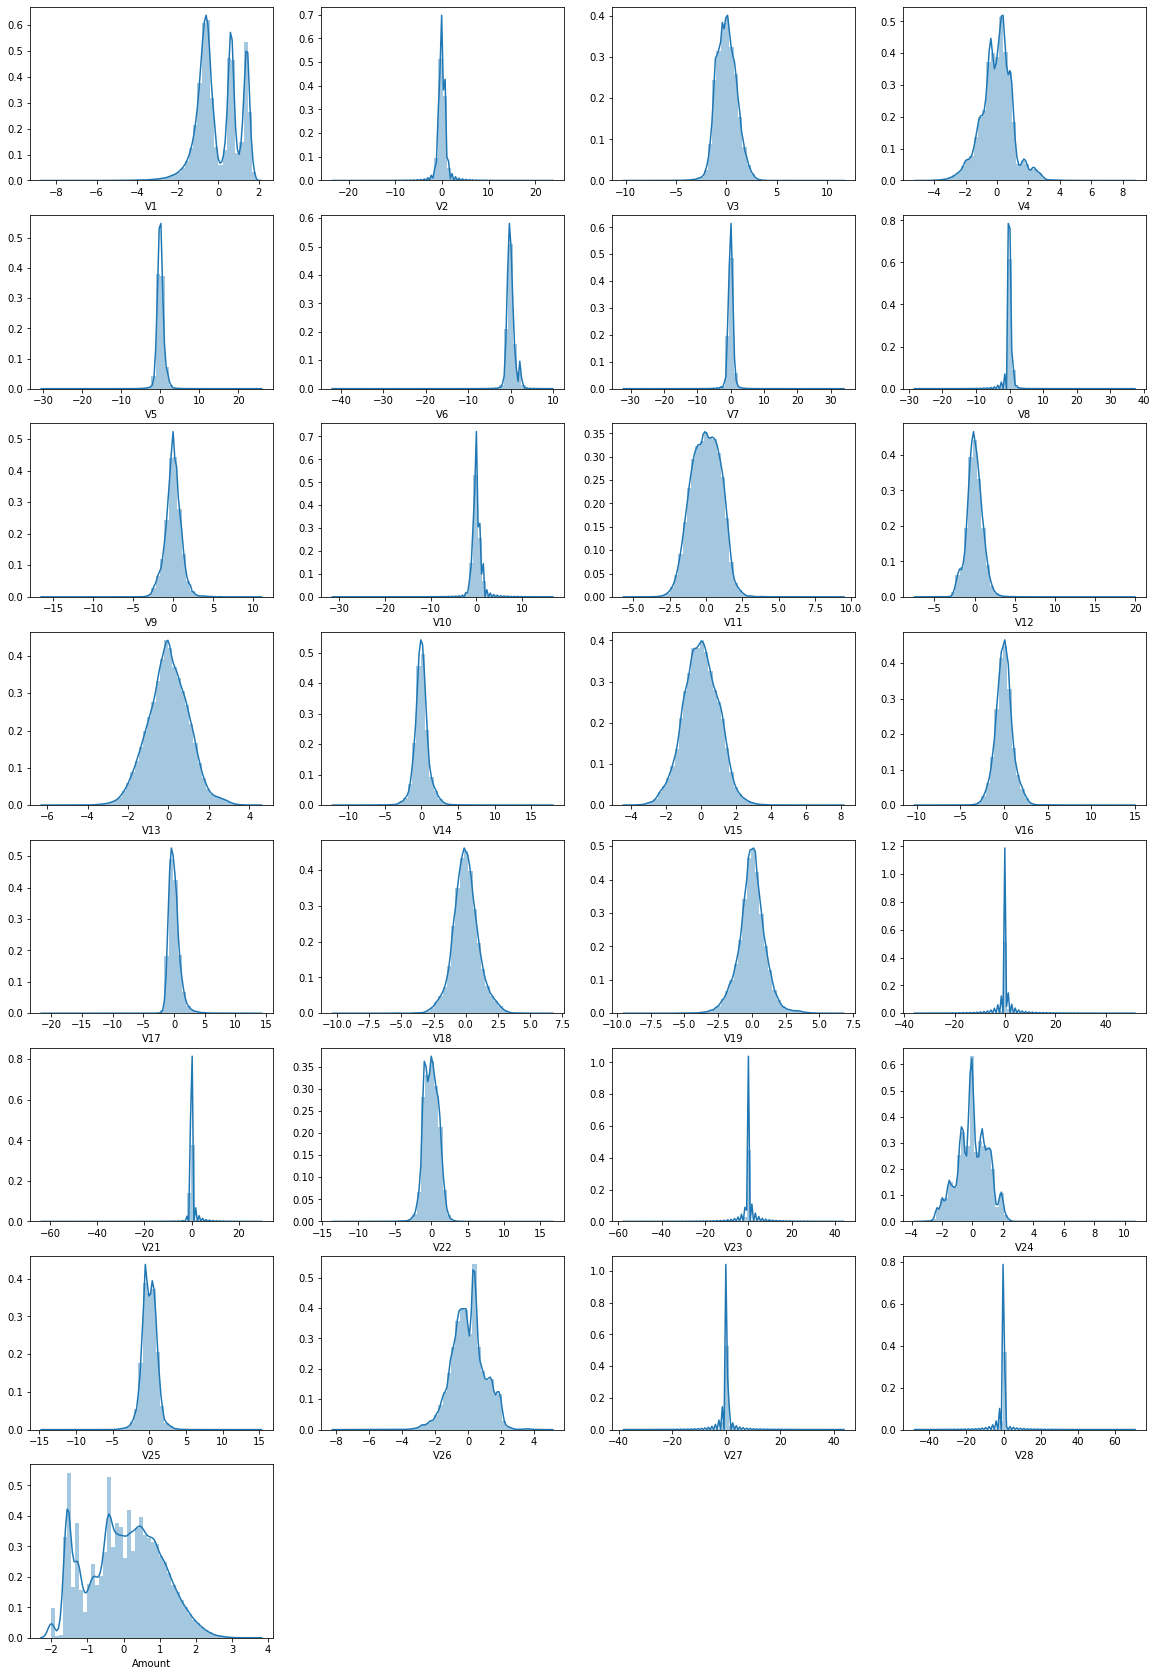

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,30))
m = 1
for i in X_train.columns:
    plt.subplot(8,4,m)
    sns.distplot(X_train[i])
    m +=1
plt.show()

As we can see the data is mostly skewed now. We can proceed with model building.

## Model Building
- Build different models on the imbalanced dataset and see the result

In [23]:
# ROC curve meausres the performance of the model at different thresholds which will help us find the optimum threshold for the model.
# We create the below Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

def plot_roc(fpr,tpr):
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Test Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    print("Train metrics")
    prob_train = clf.predict_proba(X_train)
    prob_train = prob_train[:, 1]
    auc_train = roc_auc_score(y_train, prob_train) 
    print('AUC Train: %.5f' % auc_train)
    train_predicted=clf.predict(X_train)    
    print("Train Accuracy: ",metrics.accuracy_score(y_train, train_predicted))
    report_train = classification_report(y_train, train_predicted)
    print(report_train)
    cm=confusion_matrix(y_train, train_predicted)
    print("Train Confusion Matrix:\n",cm)
    print("Test metrics")
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC Test: %.5f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label=1)
    plot_roc(fpr,tpr)
    test_predicted=clf.predict(X_test)
    print("Test Accuracy: ",metrics.accuracy_score(y_test, test_predicted))
    report_test = classification_report(y_test, test_predicted)
    print(report_test)
    cm=confusion_matrix(y_test, test_predicted)
    print("Test Confusion Matrix:\n",cm)
    return auc

C: 0.001
Coefficient of each feature: [[-6.60471358e-02  4.28226580e-02 -1.53300269e-01  2.26108918e-01
   2.37842815e-02 -3.82778361e-02 -6.09456786e-02 -1.16209649e-01
  -1.06186645e-01 -2.29603395e-01  1.87422621e-01 -2.40741918e-01
  -3.05360925e-02 -4.08646618e-01 -7.82157943e-03 -1.29530000e-01
  -1.15154600e-01 -7.39528312e-03  4.69762171e-03  1.01367443e-02
   4.52754762e-02  2.44274607e-02 -2.28782993e-02 -2.58692464e-02
  -5.74173385e-03  8.23042078e-03 -6.88240353e-03  6.48534239e-03
   3.36256829e-04]]
Training accuracy: 0.9990300423533542
Test accuracy: 0.9989817773252344
AUC: 0.97


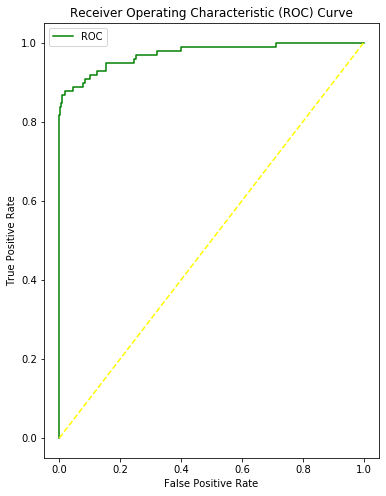

{'0': {'precision': 0.9991564444132016, 'recall': 0.9998241418120428, 'f1-score': 0.9994901816008298, 'support': 56864}, '1': {'precision': 0.8333333333333334, 'recall': 0.5102040816326531, 'f1-score': 0.6329113924050633, 'support': 98}, 'accuracy': 0.9989817773252344, 'macro avg': {'precision': 0.9162448888732675, 'recall': 0.7550141117223479, 'f1-score': 0.8162007870029466, 'support': 56962}, 'weighted avg': {'precision': 0.9988711548361883, 'recall': 0.9989817773252344, 'f1-score': 0.9988595028792052, 'support': 56962}}
AUC:  0.972215482985541

C: 0.01
Coefficient of each feature: [[-0.17257346 -0.06401676 -0.25933487  0.56951121  0.00627568  0.04087893
  -0.13771049 -0.21717273 -0.14692996 -0.23196957  0.18419846 -0.45154053
  -0.0870039  -0.66755541 -0.08020887 -0.23247355 -0.00456867  0.04405543
  -0.04274639 -0.01403969  0.08036143  0.1280864  -0.06990923 -0.00787596
   0.02859643 -0.00084554 -0.07780947 -0.02595218  0.04584264]]
Training accuracy: 0.9992275450415853
Test accura

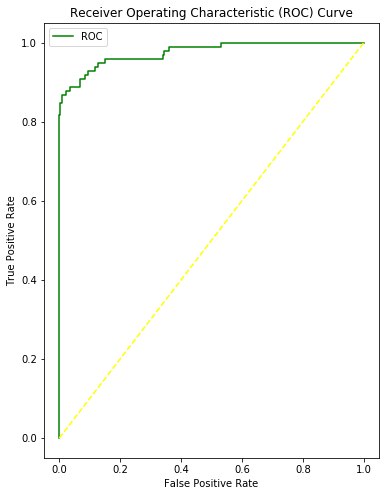

{'0': {'precision': 0.9993496563724887, 'recall': 0.9998593134496342, 'f1-score': 0.9996044199477835, 'support': 56864}, '1': {'precision': 0.8840579710144928, 'recall': 0.6224489795918368, 'f1-score': 0.7305389221556887, 'support': 98}, 'accuracy': 0.9992099996488887, 'macro avg': {'precision': 0.9417038136934908, 'recall': 0.8111541465207355, 'f1-score': 0.8650716710517361, 'support': 56962}, 'weighted avg': {'precision': 0.9991513033447672, 'recall': 0.9992099996488887, 'f1-score': 0.9991415075011766, 'support': 56962}}
AUC:  0.9757348001102524

C: 0.1
Coefficient of each feature: [[-0.21905317 -0.20049794 -0.33584311  0.78176345 -0.06476097  0.1158792
  -0.23996008 -0.2434055  -0.16646746 -0.1668804   0.0811265  -0.5780279
  -0.16045316 -0.77114558 -0.13817006 -0.39127426  0.08989124  0.09045338
  -0.11042068 -0.03715845  0.14071228  0.3010767  -0.09393008  0.03784283
   0.10608334 -0.07370722 -0.08417074 -0.04420734  0.01611855]]
Training accuracy: 0.9992538787333495
Test accuracy

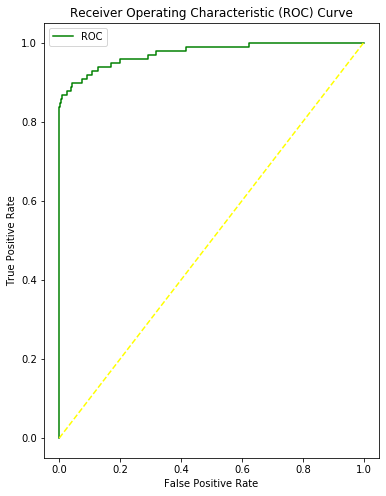

{'0': {'precision': 0.999419902613954, 'recall': 0.9998241418120428, 'f1-score': 0.999621981345219, 'support': 56864}, '1': {'precision': 0.8666666666666667, 'recall': 0.6632653061224489, 'f1-score': 0.7514450867052023, 'support': 98}, 'accuracy': 0.9992451107756047, 'macro avg': {'precision': 0.9330432846403103, 'recall': 0.8315447239672459, 'f1-score': 0.8755335340252106, 'support': 56962}, 'weighted avg': {'precision': 0.9991915079451777, 'recall': 0.9992451107756047, 'f1-score': 0.9991950065958296, 'support': 56962}}
AUC:  0.9738750100490394

C: 1
Coefficient of each feature: [[-2.23644763e-01 -2.34597304e-01 -3.56362763e-01  8.20217972e-01
  -8.57833832e-02  1.32165342e-01 -2.62851994e-01 -2.46919293e-01
  -1.76030519e-01 -1.48388477e-01  5.60160544e-02 -6.06549370e-01
  -1.76615272e-01 -7.93538935e-01 -1.46424073e-01 -4.31633124e-01
   1.12116348e-01  1.04004934e-01 -1.26809035e-01 -4.29503460e-02
   1.58583587e-01  3.54170474e-01 -1.02395951e-01  4.88023170e-02
   1.27994393e-01

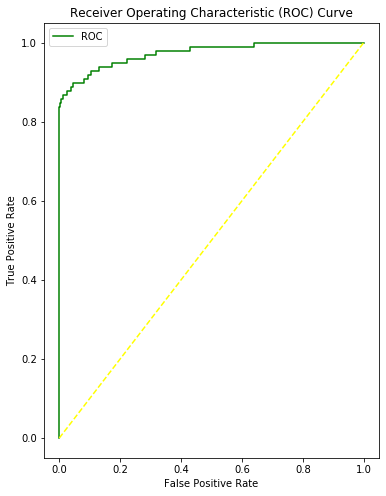

{'0': {'precision': 0.9994374714340962, 'recall': 0.9998241418120428, 'f1-score': 0.9996307692307693, 'support': 56864}, '1': {'precision': 0.868421052631579, 'recall': 0.673469387755102, 'f1-score': 0.7586206896551724, 'support': 98}, 'accuracy': 0.9992626663389628, 'macro avg': {'precision': 0.9339292620328377, 'recall': 0.8366467647835725, 'f1-score': 0.8791257294429708, 'support': 56962}, 'weighted avg': {'precision': 0.9992120648640557, 'recall': 0.9992626663389628, 'f1-score': 0.9992161245940219, 'support': 56962}}
AUC:  0.9732627364395392

C: 10
Coefficient of each feature: [[-0.22404715 -0.23860449 -0.35876861  0.82449312 -0.08829892  0.13404966
  -0.26548021 -0.24727333 -0.17728399 -0.14616237  0.05315994 -0.60991981
  -0.17840225 -0.79612465 -0.14727849 -0.4362674   0.11466889  0.105621
  -0.12866372 -0.04361731  0.16077213  0.3606927  -0.10346997  0.05007374
   0.13066111 -0.10807604 -0.08346388 -0.04851708 -0.00268799]]
Training accuracy: 0.9992538787333495
Test accuracy: 0

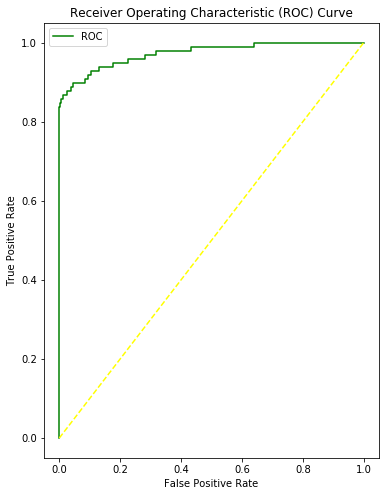

{'0': {'precision': 0.9994374714340962, 'recall': 0.9998241418120428, 'f1-score': 0.9996307692307693, 'support': 56864}, '1': {'precision': 0.868421052631579, 'recall': 0.673469387755102, 'f1-score': 0.7586206896551724, 'support': 98}, 'accuracy': 0.9992626663389628, 'macro avg': {'precision': 0.9339292620328377, 'recall': 0.8366467647835725, 'f1-score': 0.8791257294429708, 'support': 56962}, 'weighted avg': {'precision': 0.9992120648640557, 'recall': 0.9992626663389628, 'f1-score': 0.9992161245940219, 'support': 56962}}
AUC:  0.9731859330676558

C: 100
Coefficient of each feature: [[-0.22409922 -0.23903568 -0.35901775  0.82494575 -0.08856373  0.13424763
  -0.26576773 -0.24732842 -0.17743077 -0.14590707  0.05287173 -0.61035955
  -0.17858437 -0.79641437 -0.14739088 -0.4367458   0.11494779  0.10575322
  -0.12881638 -0.04368495  0.16100656  0.36136828 -0.10358477  0.05021175
   0.13093872 -0.10851578 -0.08345705 -0.04856625 -0.00291588]]
Training accuracy: 0.9992538787333495
Test accuracy

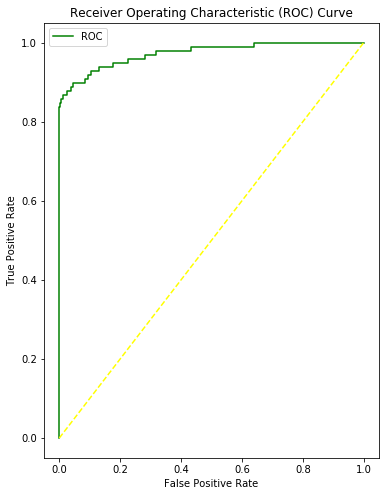

{'0': {'precision': 0.9994374714340962, 'recall': 0.9998241418120428, 'f1-score': 0.9996307692307693, 'support': 56864}, '1': {'precision': 0.868421052631579, 'recall': 0.673469387755102, 'f1-score': 0.7586206896551724, 'support': 98}, 'accuracy': 0.9992626663389628, 'macro avg': {'precision': 0.9339292620328377, 'recall': 0.8366467647835725, 'f1-score': 0.8791257294429708, 'support': 56962}, 'weighted avg': {'precision': 0.9992120648640557, 'recall': 0.9992626663389628, 'f1-score': 0.9992161245940219, 'support': 56962}}
AUC:  0.9731805496537388



In [29]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV

num_C = [0.001,0.01,0.1,1,10,100]  #--> list of values
#cv_num =   #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('AUC: ', clf_score(clf))
  print('')

Here we see that the best C value is 0.01, since AUC is maximum of 0.9757

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [30]:
#perform cross validation
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9807216349266626


Train metrics
AUC Train: 0.98433
Train Accuracy:  0.9992275450415853
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227423     28]
 [   148    246]]
Test metrics
AUC Test: 0.97573


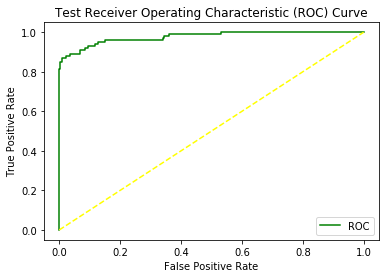

Test Accuracy:  0.9992099996488887
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56856     8]
 [   37    61]]


0.9757348001102524

In [103]:
# Fitting the model as per the best fit
lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost
- KNN
- SVM - We did not try this as it takes too long time.

### Decision Tree

In [32]:
#importing libraries

from sklearn import tree
from pprint import pprint

In [33]:
# 5 fold cross validation for getting best parameter

depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990827097368825, 0.9992802124251137, 0.999297768219623, 0.9993636024490333, 0.9994733261647173, 0.9994864930105993, 0.9994645482674626, 0.9994689372160899, 0.9994206587811888, 0.9994162698325617, 0.9993855471921702, 0.9993987140380522, 0.9993460466545241, 0.9992889903223683, 0.9992933792709955, 0.999297768219623, 0.999249489784722, 0.9992187671443306, 0.9992626566306042]


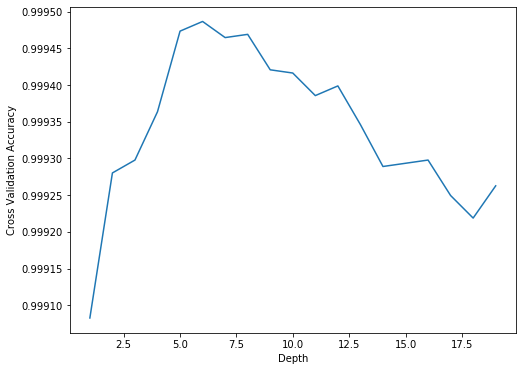

In [34]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

We see that accuracy is highest at depth of 5, so we use that for our model.

In [104]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

Train metrics
AUC Train: 0.92631
Train Accuracy:  0.9995962167262832
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.95      0.81      0.87       394

    accuracy                           1.00    227845
   macro avg       0.97      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227434     17]
 [    75    319]]
Test metrics
AUC Test: 0.87226


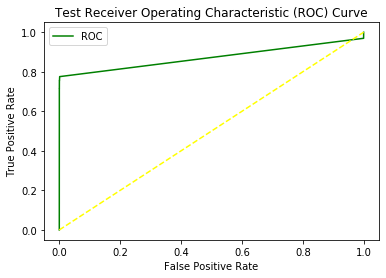

Test Accuracy:  0.9993504441557529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.71      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56855     9]
 [   28    70]]


0.8722628031938717

In [105]:
#Plotting ROC
clf_score(dt_clf)

We obtain an AUC score of 0.88. The precision and recall are lower than logistic regression.

### Random Forest Classifier

In [95]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'n_estimators': 50}
accuracy : 0.9738867840862149


Train metrics
AUC Train: 0.98235
Train Accuracy:  0.9996444951611841
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.81      0.89       394

    accuracy                           1.00    227845
   macro avg       0.99      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227445      6]
 [    75    319]]
Test metrics
AUC Test: 0.96575


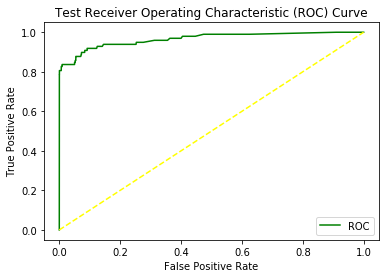

Test Accuracy:  0.999385555282469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.68      0.79        98

    accuracy                           1.00     56962
   macro avg       0.97      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56860     4]
 [   31    67]]


0.9657510795539375

In [106]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=7, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)

In [39]:
#import libraries
from xgboost import XGBClassifier
from scipy import stats

# Using grid search cv to find the best parameters.

xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 130}
accuracy : 0.9839569438424611


Best hyperparameters are - 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 130

Train metrics
AUC Train: 1.00000
Train Accuracy:  0.9999209989247075
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.95      0.98       394

    accuracy                           1.00    227845
   macro avg       1.00      0.98      0.99    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [    18    376]]
Test metrics
AUC Test: 0.97630


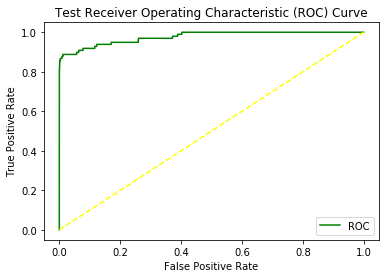

Test Accuracy:  0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56860     4]
 [   24    74]]


0.9762963799053668

In [107]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=3)

xgb_clf = xgbst.fit(X_train,y_train)

#Plotting ROC
clf_score(xgb_clf)

Details are as below:
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962


AUC: 0.98

### KNN

In [41]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# We take only odd integers as K values so that majority rule is appalied. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [42]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]


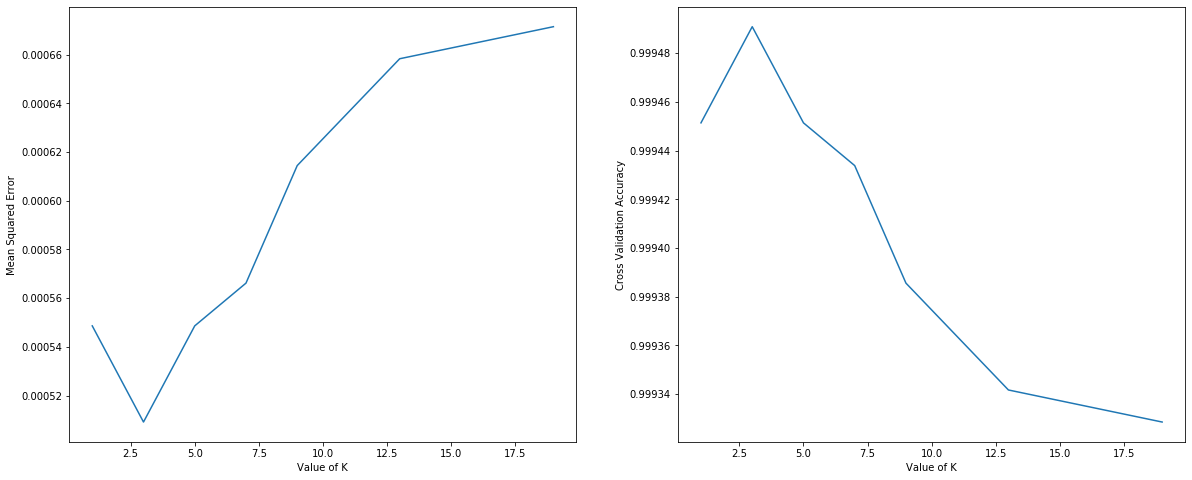

In [43]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [124]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

Train metrics
AUC Train: 0.99996
Train Accuracy:  0.9996576620070662
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.82      0.89       394

    accuracy                           1.00    227845
   macro avg       0.99      0.91      0.95    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227444      7]
 [    71    323]]
Test metrics
AUC Test: 0.90300


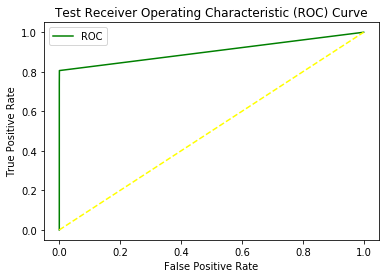

Test Accuracy:  0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56861     3]
 [   25    73]]


0.902998417994097

In [125]:
# Checking AUC 

clf_score(knn_clf)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

Among all the models we see that XGBoost has the best AUC score, and better Precision and Recall. S0 we take that model for model building with Unbalanced dataset.

Train metrics
AUC Train: 1.00000
Train Accuracy:  0.9999209989247075
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.95      0.98       394

    accuracy                           1.00    227845
   macro avg       1.00      0.98      0.99    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [    18    376]]
Test metrics
AUC Test: 0.97630


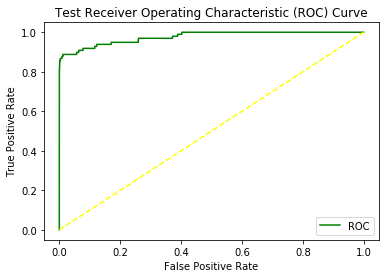

Test Accuracy:  0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56860     4]
 [   24    74]]


0.9762963799053668

In [108]:
clf = XGBClassifier(n_estimators=130,max_depth=3,min_child_weight=3)  #initialise the model with optimum hyperparameters
final_clf = clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric
clf_score(final_clf)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


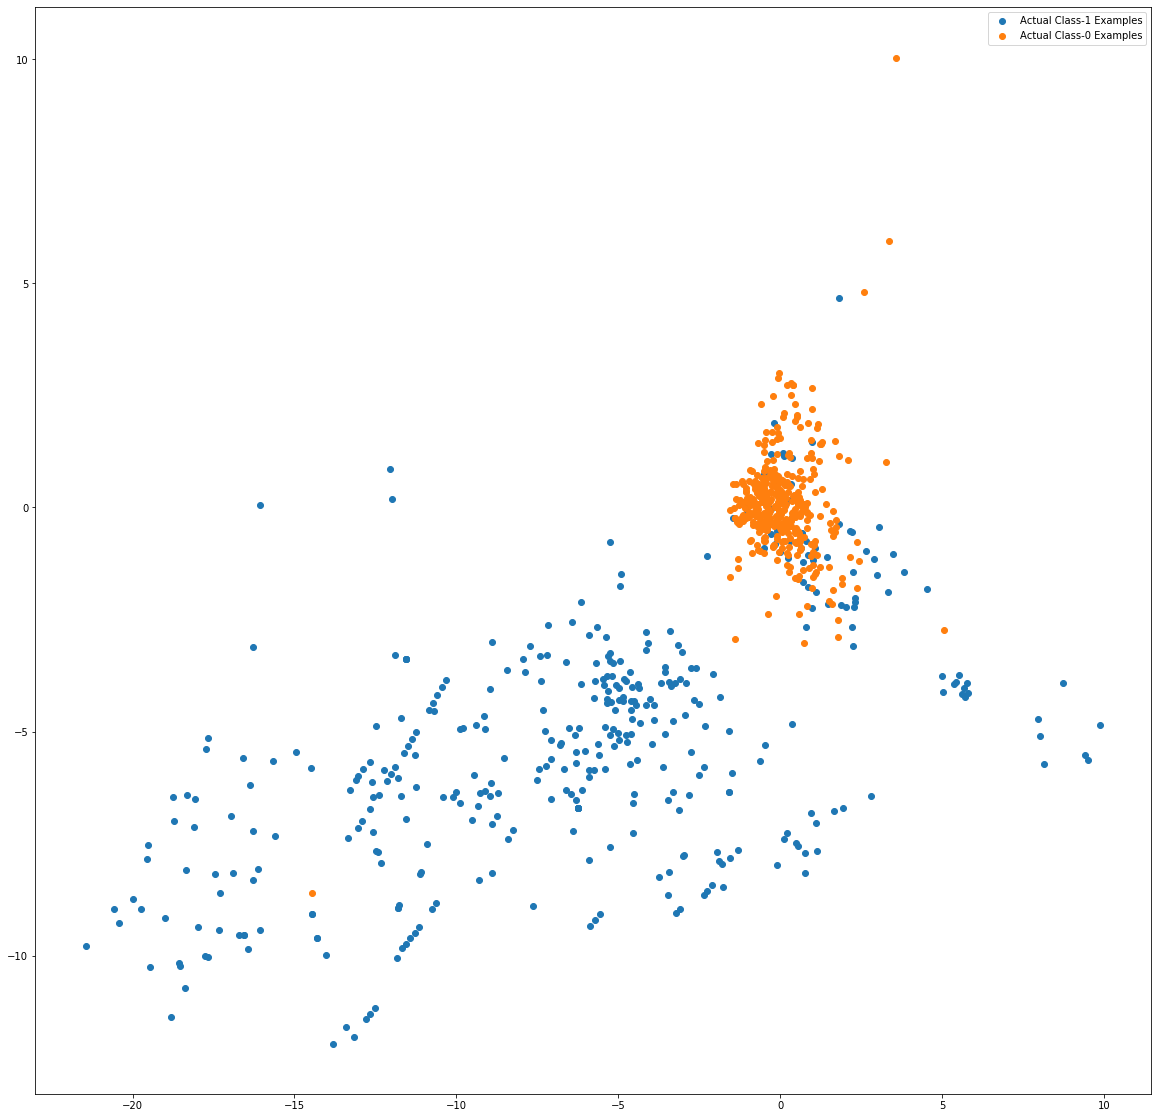

In [109]:
var_imp = []
for i in final_clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Balancing Technique - Random Oversampling

In [48]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(data=X_ros, columns=X_train.columns)

# Checking class counter after Random Oversampling
print("Fraudulent data in train set: ", y_ros.sum())
print("Total data in train set: ", y_ros.count())
print("Percentage of Fraudulent data in train set: ", y_ros.sum()*100/y_ros.count())



Using TensorFlow backend.


Fraudulent data in train set:  227451
Total data in train set:  454902
Percentage of Fraudulent data in train set:  50.0


### Balancing technique - SMOTE
### Print the class distribution after applying SMOTE 

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

Using TensorFlow backend.


In [25]:
# Checking class counter after SMOTE
print("Fraudulent data in train set: ", y_sm.sum())
print("Total data in train set: ", y_sm.count())
print("Percentage of Fraudulent data in train set: ", y_sm.sum()*100/y_sm.count())

Fraudulent data in train set:  227451
Total data in train set:  454902
Percentage of Fraudulent data in train set:  50.0


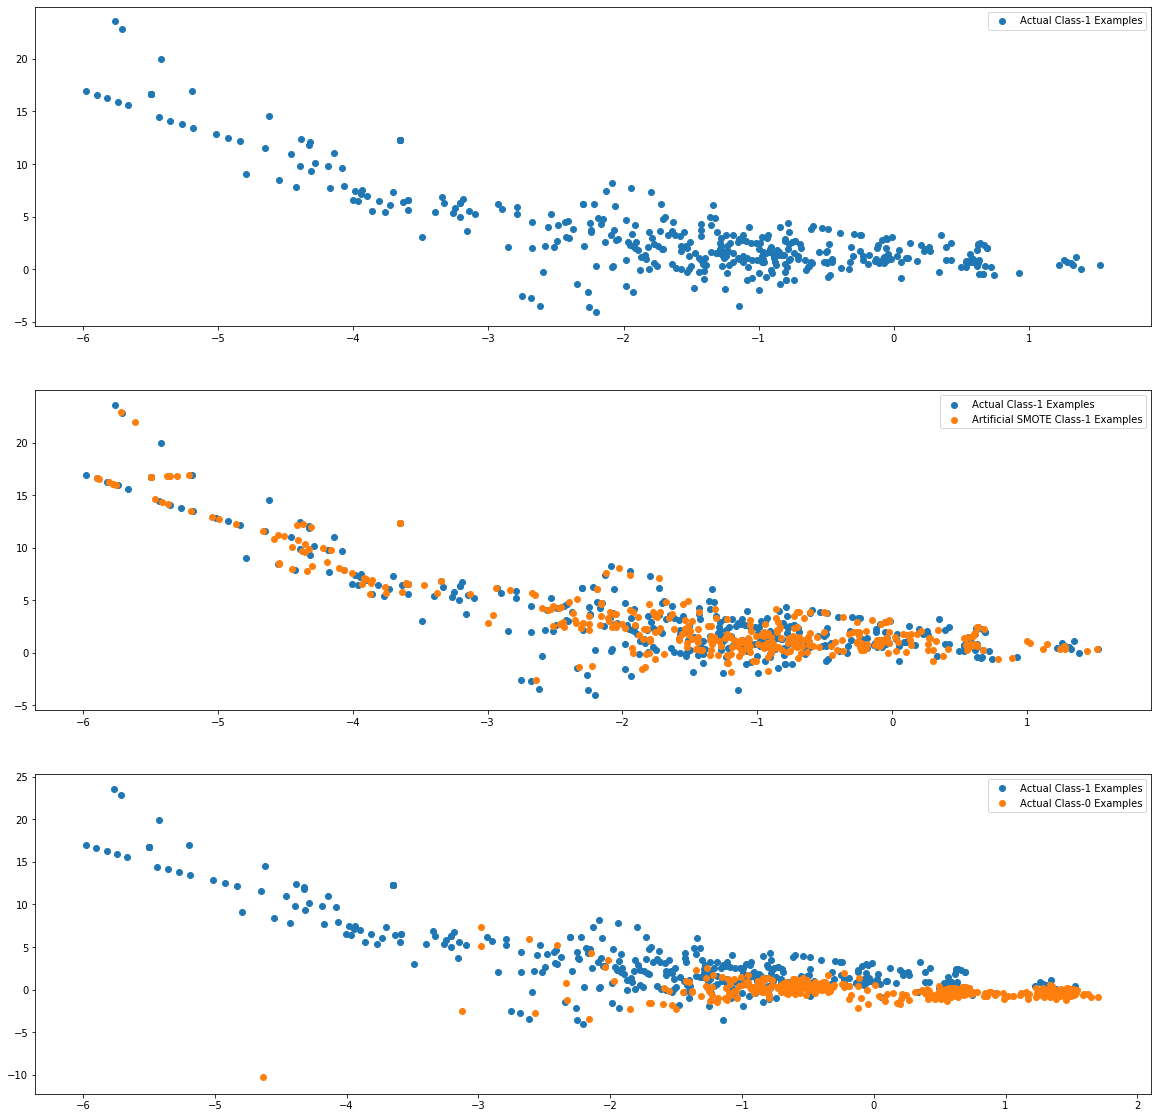

In [26]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_sm[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()
#print(X_train_smote_1.iloc[:394,0])
#print(X_train_1.shape[0])

#print(X_train_smote_1[:X_train_1.shape[0], 0])
#print(X_train_smote_1[:X_train_1.shape[0], 1])
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying ADASYN

In [52]:
# We also try class balancing with ADASYN
# importing ADASYN

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

In [53]:
# Checking class counter after ADASYN
print("Fraudulent data in train set: ", y_ada.sum())
print("Total data in train set: ", y_ada.count())
print("Percentage of Fraudulent data in train set: ", y_ada.sum()*100/y_ada.count())

Fraudulent data in train set:  227460
Total data in train set:  454911
Percentage of Fraudulent data in train set:  50.000989204481755


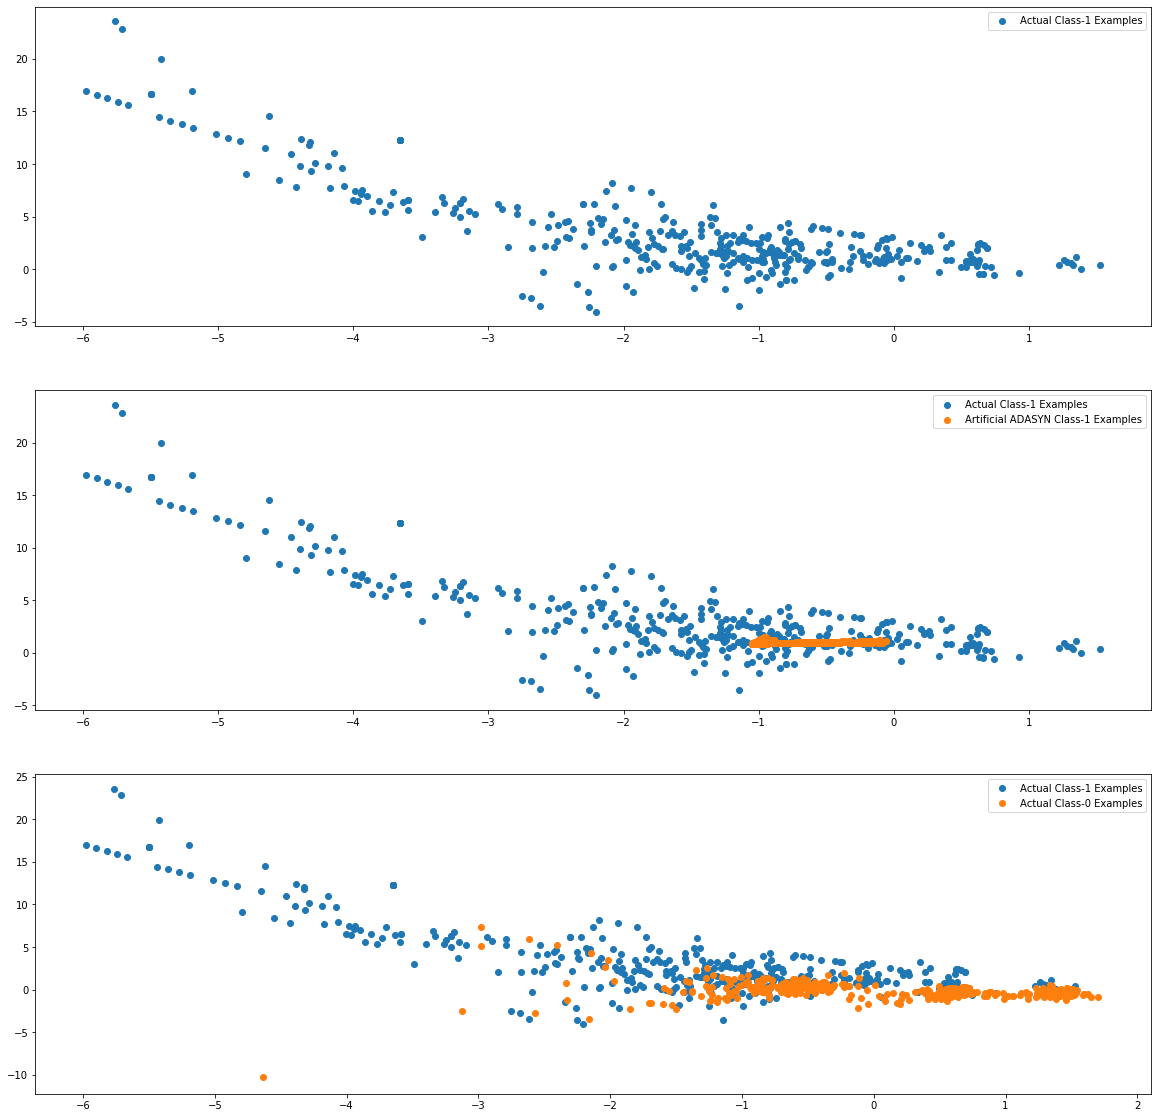

In [54]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_ada[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Modelling with the balanced datasets

### Logistic Regression

C: 0.001
Coefficient of each feature: [[-0.17388298 -0.2225934  -0.2678355   1.3323707  -0.06529731 -0.18260891
  -0.10738057 -0.55783633 -0.30032417 -0.68224703  0.39189754 -0.79037466
  -0.18388922 -0.90172098 -0.16012072 -0.40187903 -0.21785803  0.03809094
   0.03603109 -0.07189603  0.11982727  0.27083239 -0.21282693 -0.08765142
   0.06819912 -0.27064213 -0.02452605  0.05030367 -0.10836239]]
Training accuracy: 0.951734659333219
Test accuracy: 0.9780204346757487
AUC: 0.98


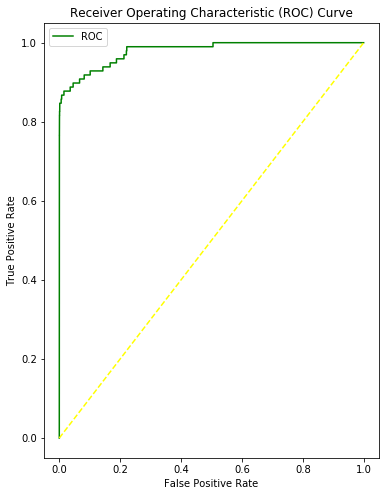

{'0': {'precision': 0.9997843123157668, 'recall': 0.9781935846933033, 'f1-score': 0.9888711111111111, 'support': 56864}, '1': {'precision': 0.06485671191553545, 'recall': 0.8775510204081632, 'f1-score': 0.12078651685393259, 'support': 98}, 'accuracy': 0.9780204346757487, 'macro avg': {'precision': 0.5323205121156511, 'recall': 0.9278723025507333, 'f1-score': 0.5548288139825218, 'support': 56962}, 'weighted avg': {'precision': 0.9981758206048152, 'recall': 0.9780204346757487, 'f1-score': 0.9873776191298393, 'support': 56962}}
AUC:  0.9792445168134783

C: 0.01
Coefficient of each feature: [[ 0.06612877 -0.49130872 -0.21905501  1.6526878  -0.08499117 -0.18407826
  -0.23148928 -0.86057715 -0.59089512 -1.26188562  0.61941174 -1.20561855
  -0.16854081 -1.26137808 -0.22098337 -0.69103281 -0.6320588  -0.07566815
   0.12896151 -0.16106982  0.19154419  0.31611418 -0.25599363 -0.12649508
  -0.01321328 -0.31750357 -0.06677626  0.0614635  -0.18831199]]
Training accuracy: 0.9527942282073941
Test acc

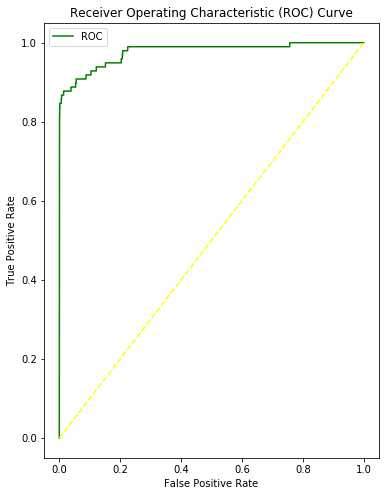

{'0': {'precision': 0.9997837214332059, 'recall': 0.9755205402363534, 'f1-score': 0.9875031153202548, 'support': 56864}, '1': {'precision': 0.058186738836265225, 'recall': 0.8775510204081632, 'f1-score': 0.10913705583756345, 'support': 98}, 'accuracy': 0.9753519890453285, 'macro avg': {'precision': 0.5289852301347355, 'recall': 0.9265357803222583, 'f1-score': 0.5483200855789091, 'support': 56962}, 'weighted avg': {'precision': 0.9981637554156064, 'recall': 0.9753519890453285, 'f1-score': 0.9859919346413933, 'support': 56962}}
AUC:  0.9769551303216841

C: 0.1
Coefficient of each feature: [[ 0.14948143 -0.57597694 -0.19924896  1.73911607 -0.08549276 -0.17913685
  -0.27049306 -0.93871051 -0.6874702  -1.44527651  0.6803696  -1.32086168
  -0.16278594 -1.35421398 -0.23574386 -0.76874699 -0.74857009 -0.10910865
   0.15710586 -0.19675668  0.21501611  0.32417259 -0.26689898 -0.13381399
  -0.04071735 -0.32590533 -0.08598172  0.06393488 -0.20515529]]
Training accuracy: 0.9549265556097797
Test acc

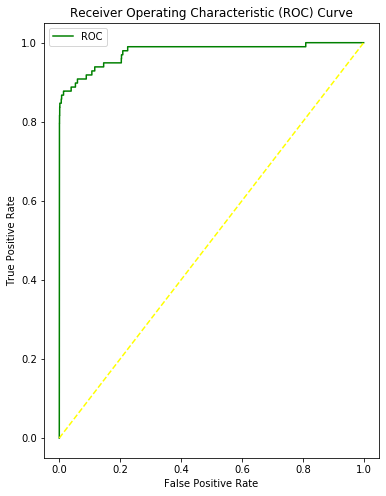

{'0': {'precision': 0.9997835497835498, 'recall': 0.9747467642093416, 'f1-score': 0.987106425416726, 'support': 56864}, '1': {'precision': 0.056504599211563734, 'recall': 0.8775510204081632, 'f1-score': 0.10617283950617284, 'support': 98}, 'accuracy': 0.9745795442575752, 'macro avg': {'precision': 0.5281440744975567, 'recall': 0.9261488923087524, 'f1-score': 0.5466396324614494, 'support': 56962}, 'weighted avg': {'precision': 0.9981606900322059, 'recall': 0.9745795442575752, 'f1-score': 0.9855908274493226, 'support': 56962}}
AUC:  0.976476006483066

C: 1
Coefficient of each feature: [[ 0.16014805 -0.58671642 -0.19668743  1.74984816 -0.0854692  -0.178397
  -0.27544684 -0.94825882 -0.69981252 -1.46853751  0.68786028 -1.33513915
  -0.16206359 -1.36554504 -0.23752829 -0.77831885 -0.76302809 -0.11326775
   0.16062919 -0.20145244  0.21802042  0.32509178 -0.26823662 -0.13464382
  -0.04420658 -0.32687112 -0.08854825  0.0642311  -0.20712784]]
Training accuracy: 0.9548781935449833
Test accuracy:

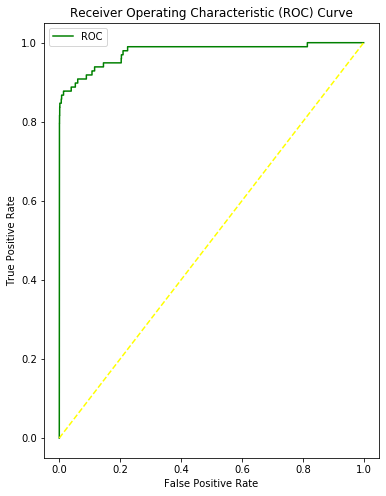

{'0': {'precision': 0.9997835341655242, 'recall': 0.9746764209341587, 'f1-score': 0.9870703472840606, 'support': 56864}, '1': {'precision': 0.0563564875491481, 'recall': 0.8775510204081632, 'f1-score': 0.10591133004926108, 'support': 98}, 'accuracy': 0.9745093220041431, 'macro avg': {'precision': 0.5280700108573362, 'recall': 0.9261137206711609, 'f1-score': 0.5464908386666608, 'support': 56962}, 'weighted avg': {'precision': 0.9981604196230501, 'recall': 0.9745093220041431, 'f1-score': 0.9855543614744153, 'support': 56962}}
AUC:  0.9764189422955452

C: 10
Coefficient of each feature: [[ 0.16128269 -0.58783333 -0.19641109  1.75096138 -0.08547273 -0.17833815
  -0.27596256 -0.94925183 -0.70111741 -1.47094488  0.68863182 -1.33663266
  -0.16198484 -1.36672008 -0.23771863 -0.77932322 -0.76451423 -0.11369283
   0.16099657 -0.20195102  0.21832783  0.32519974 -0.26836851 -0.13473049
  -0.04456786 -0.32697761 -0.08881899  0.06426821 -0.20733101]]
Training accuracy: 0.9548694004422931
Test accura

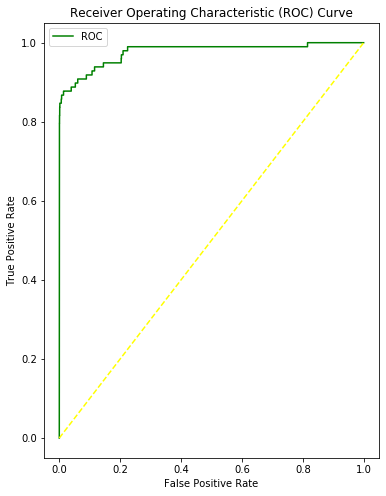

{'0': {'precision': 0.9997835341655242, 'recall': 0.9746764209341587, 'f1-score': 0.9870703472840606, 'support': 56864}, '1': {'precision': 0.0563564875491481, 'recall': 0.8775510204081632, 'f1-score': 0.10591133004926108, 'support': 98}, 'accuracy': 0.9745093220041431, 'macro avg': {'precision': 0.5280700108573362, 'recall': 0.9261137206711609, 'f1-score': 0.5464908386666608, 'support': 56962}, 'weighted avg': {'precision': 0.9981604196230501, 'recall': 0.9745093220041431, 'f1-score': 0.9855543614744153, 'support': 56962}}
AUC:  0.976414815011542

C: 100
Coefficient of each feature: [[ 0.16139291 -0.58794426 -0.19638436  1.75107185 -0.08547267 -0.17833069
  -0.27601347 -0.9493496  -0.70124517 -1.47118503  0.68870826 -1.33677885
  -0.16197739 -1.36683554 -0.237737   -0.77942116 -0.76466226 -0.11373552
   0.16103299 -0.20200012  0.21835892  0.3252092  -0.26838227 -0.13473897
  -0.04460402 -0.32698739 -0.08884614  0.06427114 -0.20735102]]
Training accuracy: 0.9548672021666205
Test accura

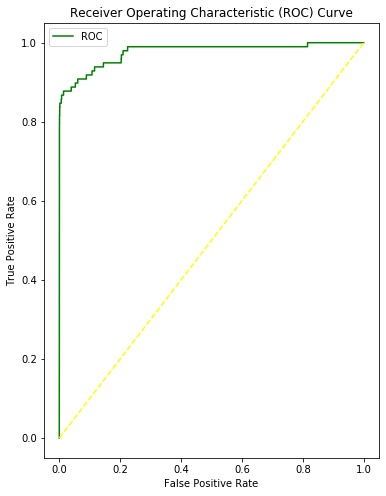

{'0': {'precision': 0.9997835341655242, 'recall': 0.9746764209341587, 'f1-score': 0.9870703472840606, 'support': 56864}, '1': {'precision': 0.0563564875491481, 'recall': 0.8775510204081632, 'f1-score': 0.10591133004926108, 'support': 98}, 'accuracy': 0.9745093220041431, 'macro avg': {'precision': 0.5280700108573362, 'recall': 0.9261137206711609, 'f1-score': 0.5464908386666608, 'support': 56962}, 'weighted avg': {'precision': 0.9981604196230501, 'recall': 0.9745093220041431, 'f1-score': 0.9855543614744153, 'support': 56962}}
AUC:  0.976414456117281



In [55]:
#LR with Random Oversampling
for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_ros, y_ros)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_ros, y_ros))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('AUC: ', clf_score(clf))
  print('')

We see that the best fit is for C=0.001 where AUC is the max, and accuracy is also Maximum

Train metrics
AUC Train: 0.98773
Train Accuracy:  0.9782790932432136
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.92      0.13       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.56    227845
weighted avg       1.00      0.98      0.99    227845

Train Confusion Matrix:
 [[222532   4919]
 [    30    364]]
Test metrics
AUC Test: 0.97924


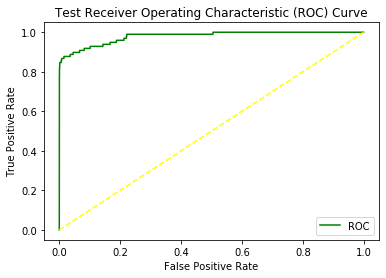

Test Accuracy:  0.9780204346757487
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Test Confusion Matrix:
 [[55624  1240]
 [   12    86]]


0.9792445168134783

In [110]:
# Logistic Regression with Random Oversampling
# Using the best parameters that we got from the cross validation on balanced data.

lsr_best = LogisticRegression(penalty='l2',C=0.001,random_state = 0)
lsr_sm = lsr_best.fit(X_ros, y_ros)

# Printing ROC curve and accuracy scores
clf_score(lsr_sm)

C: 0.001
Coefficient of each feature: [[-0.09752458 -0.14695959 -0.19481247  1.32851173  0.01976854 -0.17898601
  -0.03539515 -0.53803023 -0.34719685 -0.78582052  0.49634646 -0.72944462
  -0.24984913 -0.97326009 -0.0989717  -0.36105377 -0.20430432  0.01580015
   0.05522678 -0.08525585  0.07114213  0.17429103 -0.13298465 -0.03790286
   0.06927345 -0.29679114 -0.00852332  0.08678762 -0.09749644]]
Training accuracy: 0.9458190994983535
Test accuracy: 0.9752642112285383
AUC: 0.98


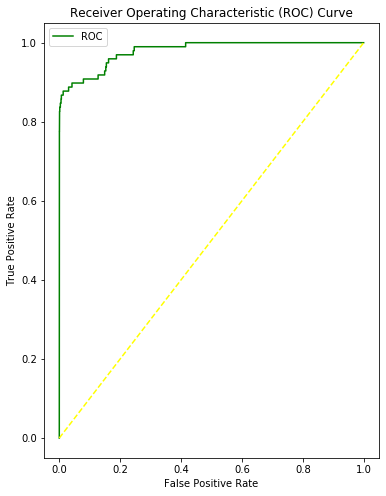

{'0': {'precision': 0.9997837019412751, 'recall': 0.9754326111423748, 'f1-score': 0.9874580525711438, 'support': 56864}, '1': {'precision': 0.05799055967633176, 'recall': 0.8775510204081632, 'f1-score': 0.10879190385831752, 'support': 98}, 'accuracy': 0.9752642112285383, 'macro avg': {'precision': 0.5288871308088035, 'recall': 0.9264918157752691, 'f1-score': 0.5481249782147307, 'support': 56962}, 'weighted avg': {'precision': 0.9981633984417146, 'recall': 0.9752642112285383, 'f1-score': 0.985946355605204, 'support': 56962}}
AUC:  0.9792585136896628

C: 0.01
Coefficient of each feature: [[ 0.1758107  -0.41509428 -0.13706312  1.68409822  0.02852036 -0.17237906
  -0.1536428  -0.8701398  -0.65944781 -1.42573223  0.7613521  -1.17734273
  -0.24350442 -1.37288111 -0.16002255 -0.67254139 -0.66562673 -0.12607472
   0.1612764  -0.17648896  0.14635849  0.20577514 -0.16724773 -0.06012109
  -0.02301243 -0.35173143 -0.03844386  0.1027878  -0.16551289]]
Training accuracy: 0.9479448320737214
Test accu

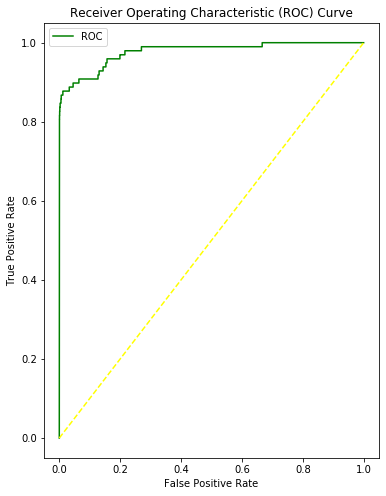

{'0': {'precision': 0.9997830998644374, 'recall': 0.9727243950478335, 'f1-score': 0.9860681528492097, 'support': 56864}, '1': {'precision': 0.05253512522907758, 'recall': 0.8775510204081632, 'f1-score': 0.09913544668587897, 'support': 98}, 'accuracy': 0.9725606544714019, 'macro avg': {'precision': 0.5261591125467575, 'recall': 0.9251377077279983, 'f1-score': 0.5426017997675443, 'support': 56962}, 'weighted avg': {'precision': 0.9981534116246588, 'recall': 0.9725606544714019, 'f1-score': 0.9845422337241087, 'support': 56962}}
AUC:  0.9770750907284692

C: 0.1
Coefficient of each feature: [[ 0.27305654 -0.50517875 -0.11452938  1.78278339  0.03366794 -0.16499036
  -0.19463862 -0.95988798 -0.76740783 -1.63352816  0.83622159 -1.30993964
  -0.23863594 -1.48253116 -0.17634247 -0.76203698 -0.80287296 -0.16886277
   0.19424651 -0.21376577  0.17200407  0.21213173 -0.1769768  -0.0650644
  -0.05415739 -0.36244068 -0.05402218  0.10717983 -0.18116725]]
Training accuracy: 0.9484262544460126
Test accur

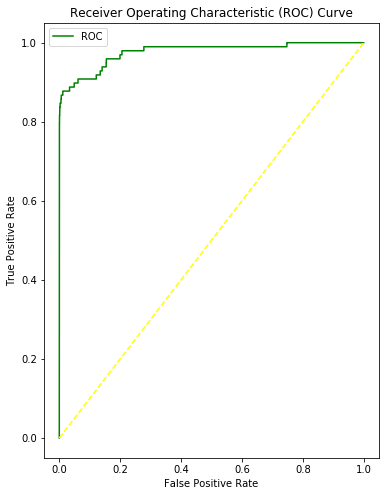

{'0': {'precision': 0.9997829939599986, 'recall': 0.9722495779403489, 'f1-score': 0.9858240758902302, 'support': 56864}, '1': {'precision': 0.051682692307692304, 'recall': 0.8775510204081632, 'f1-score': 0.09761634506242906, 'support': 98}, 'accuracy': 0.9720866542607353, 'macro avg': {'precision': 0.5257328431338455, 'recall': 0.9249002991742561, 'f1-score': 0.5417202104763297, 'support': 56962}, 'weighted avg': {'precision': 0.9981518393382872, 'recall': 0.9720866542607353, 'f1-score': 0.9842959631550537, 'support': 56962}}
AUC:  0.9763127993178138

C: 1
Coefficient of each feature: [[ 0.28575348 -0.51689941 -0.11158536  1.79522003  0.03433191 -0.16388987
  -0.20003412 -0.97103109 -0.78154362 -1.6604196   0.84560862 -1.32675272
  -0.23796304 -1.4961854  -0.17837358 -0.77330514 -0.82023764 -0.17429592
   0.19846005 -0.21881031  0.17537344  0.21287162 -0.17819411 -0.06563056
  -0.05817878 -0.36369709 -0.05623929  0.10771752 -0.18305422]]
Training accuracy: 0.9484834096134992
Test accur

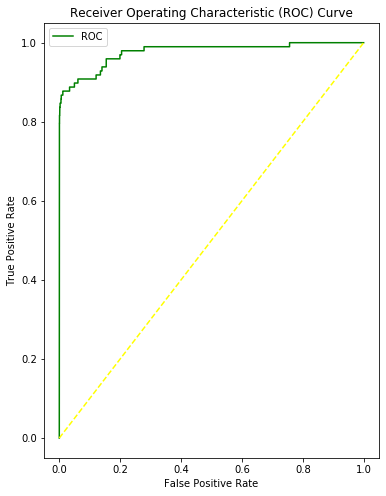

{'0': {'precision': 0.9997829625610418, 'recall': 0.9721088913899831, 'f1-score': 0.9857517342225869, 'support': 56864}, '1': {'precision': 0.05143540669856459, 'recall': 0.8775510204081632, 'f1-score': 0.09717514124293786, 'support': 98}, 'accuracy': 0.971946209753871, 'macro avg': {'precision': 0.5256091846298032, 'recall': 0.9248299558990731, 'f1-score': 0.5414634377327624, 'support': 56962}, 'weighted avg': {'precision': 0.9981513825520091, 'recall': 0.971946209753871, 'f1-score': 0.9842229868802884, 'support': 56962}}
AUC:  0.976228279719316

C: 10
Coefficient of each feature: [[ 0.28704096 -0.51808222 -0.11127646  1.79651547  0.03441507 -0.16379057
  -0.20057202 -0.97215079 -0.7829727  -1.66314705  0.84657141 -1.32845525
  -0.23790881 -1.49757652 -0.17857055 -0.77444067 -0.82202884 -0.17486567
   0.19890297 -0.2193266   0.17569595  0.21296628 -0.17831398 -0.06568251
  -0.05857079 -0.36382079 -0.05643621  0.10779022 -0.18325563]]
Training accuracy: 0.9484790130621541
Test accuracy

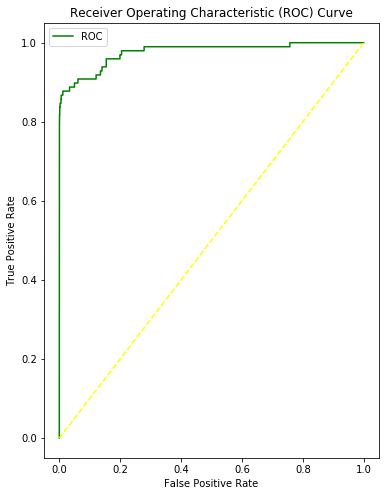

{'0': {'precision': 0.9997829625610418, 'recall': 0.9721088913899831, 'f1-score': 0.9857517342225869, 'support': 56864}, '1': {'precision': 0.05143540669856459, 'recall': 0.8775510204081632, 'f1-score': 0.09717514124293786, 'support': 98}, 'accuracy': 0.971946209753871, 'macro avg': {'precision': 0.5256091846298032, 'recall': 0.9248299558990731, 'f1-score': 0.5414634377327624, 'support': 56962}, 'weighted avg': {'precision': 0.9981513825520091, 'recall': 0.971946209753871, 'f1-score': 0.9842229868802884, 'support': 56962}}
AUC:  0.9762146417373927

C: 100
Coefficient of each feature: [[ 0.28716239 -0.51819956 -0.11125662  1.79662402  0.03441202 -0.16377884
  -0.20063861 -0.97226428 -0.78312129 -1.66341726  0.8466554  -1.3286223
  -0.23789665 -1.49771059 -0.17860024 -0.77455866 -0.82219186 -0.17490241
   0.19893076 -0.21937682  0.17573674  0.2129666  -0.17834158 -0.06569453
  -0.05862116 -0.36384193 -0.05646794  0.10777814 -0.18327439]]
Training accuracy: 0.9484790130621541
Test accurac

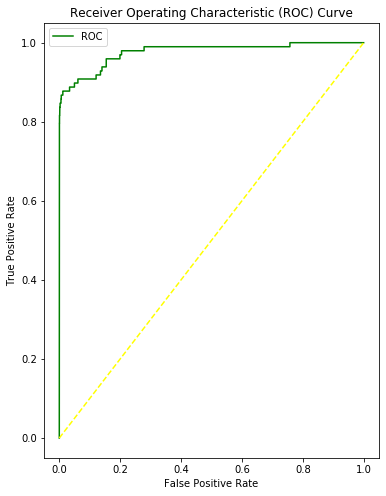

{'0': {'precision': 0.9997829625610418, 'recall': 0.9721088913899831, 'f1-score': 0.9857517342225869, 'support': 56864}, '1': {'precision': 0.05143540669856459, 'recall': 0.8775510204081632, 'f1-score': 0.09717514124293786, 'support': 98}, 'accuracy': 0.971946209753871, 'macro avg': {'precision': 0.5256091846298032, 'recall': 0.9248299558990731, 'f1-score': 0.5414634377327624, 'support': 56962}, 'weighted avg': {'precision': 0.9981513825520091, 'recall': 0.971946209753871, 'f1-score': 0.9842229868802884, 'support': 56962}}
AUC:  0.9762142828431316



In [57]:
for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_sm, y_sm)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_sm, y_sm))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('AUC: ', clf_score(clf))
  print('')

After balancing we see that AUC has increased to 0.9791 but the Precision on F1 has decreased a lot. 
We will use C as 0.001 as that gives the better AUC result.

Train metrics
AUC Train: 0.98771
Train Accuracy:  0.9750312712589699
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.93      0.11       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.98      0.99    227845

Train Confusion Matrix:
 [[221791   5660]
 [    29    365]]
Test metrics
AUC Test: 0.97926


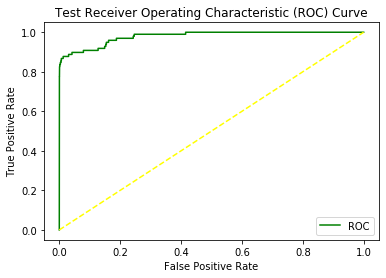

Test Accuracy:  0.9752642112285383
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Test Confusion Matrix:
 [[55467  1397]
 [   12    86]]


0.9792585136896628

In [111]:
# Logistic Regression with SMOTE
# Using the best parameters that we got from the cross validation on imbalanced data.

lsr_best = LogisticRegression(penalty='l2',C=0.001,random_state = 0)
lsr_sm = lsr_best.fit(X_sm,y_sm)

# Printing ROC curve and accuracy scores
clf_score(lsr_sm)

C: 0.001
Coefficient of each feature: [[-1.42241648e-01 -4.45411630e-01 -2.76054919e-01  1.65902511e+00
  -8.75992292e-02 -2.32464478e-01  5.60309037e-02 -8.10052326e-01
  -5.17409684e-01 -1.19599715e+00  6.99232953e-01 -9.33769289e-01
  -1.84079218e-01 -1.37022905e+00 -1.80642514e-01 -5.51151939e-01
  -4.74564358e-01  1.87249124e-02  1.72990958e-01 -2.25933608e-01
   3.12192767e-02  2.01734024e-01 -2.46822454e-01 -8.41787162e-02
   6.33866058e-02 -3.48347356e-01  7.11767558e-05  1.85500623e-01
  -3.35334611e-01]]
Training accuracy: 0.8972128614168485
Test accuracy: 0.9207541870018608
AUC: 0.98


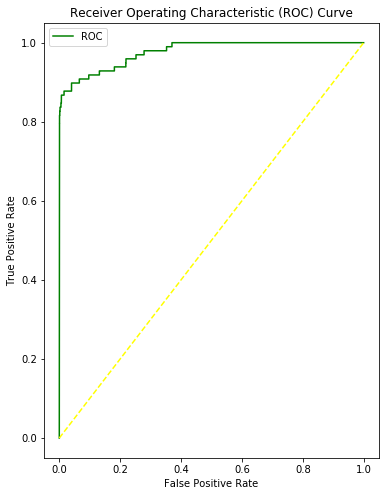

{'0': {'precision': 0.9998281393217232, 'recall': 0.9207758863252673, 'f1-score': 0.9586751135198476, 'support': 56864}, '1': {'precision': 0.019373095341750107, 'recall': 0.9081632653061225, 'f1-score': 0.03793691389599317, 'support': 98}, 'accuracy': 0.9207541870018608, 'macro avg': {'precision': 0.5096006173317367, 'recall': 0.9144695758156949, 'f1-score': 0.4983060137079204, 'support': 56962}, 'weighted avg': {'precision': 0.9981413201385829, 'recall': 0.9207541870018608, 'f1-score': 0.9570910338954817, 'support': 56962}}
AUC:  0.9765195224122287

C: 0.01
Coefficient of each feature: [[ 0.15711632 -0.82215892 -0.22481699  2.05560321 -0.11370729 -0.21611378
  -0.07389762 -1.181867   -0.89400765 -1.96468075  1.01316048 -1.44219073
  -0.14759623 -1.83917634 -0.26192915 -0.90510127 -1.04749135 -0.14278194
   0.31237637 -0.36886179  0.10909224  0.21480883 -0.30752575 -0.1052112
  -0.03706173 -0.37828921 -0.03120249  0.22714656 -0.4406671 ]]
Training accuracy: 0.8991209269505464
Test acc

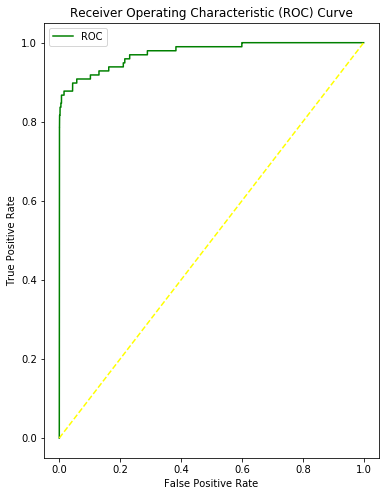

{'0': {'precision': 0.9998275267333563, 'recall': 0.9175049240292628, 'f1-score': 0.9568989233901288, 'support': 56864}, '1': {'precision': 0.018619246861924687, 'recall': 0.9081632653061225, 'f1-score': 0.036490364903649035, 'support': 98}, 'accuracy': 0.9174888522172676, 'macro avg': {'precision': 0.5092233867976405, 'recall': 0.9128340946676926, 'f1-score': 0.4966946441468889, 'support': 56962}, 'weighted avg': {'precision': 0.9981394116491352, 'recall': 0.9174888522172676, 'f1-score': 0.9553154108952784, 'support': 56962}}
AUC:  0.9742540921123655

C: 0.1
Coefficient of each feature: [[ 0.23930511 -0.91649128 -0.21501537  2.15614463 -0.12099304 -0.20929094
  -0.11806077 -1.2654723  -0.99933455 -2.17346285  1.09372667 -1.57693912
  -0.13742645 -1.95681025 -0.28112168 -0.99796359 -1.20017076 -0.18816648
   0.34901911 -0.40962091  0.13257227  0.21718385 -0.32207956 -0.10868593
  -0.0637625  -0.38320614 -0.04230306  0.2360324  -0.46185114]]
Training accuracy: 0.8991143322540013
Test ac

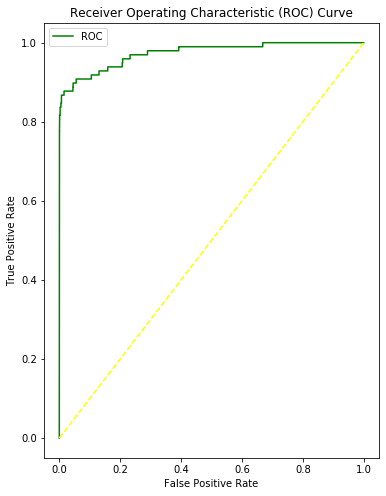

{'0': {'precision': 0.9998273613135886, 'recall': 0.9166256330894766, 'f1-score': 0.9564204190979486, 'support': 56864}, '1': {'precision': 0.018426501035196687, 'recall': 0.9081632653061225, 'f1-score': 0.03612012987012987, 'support': 98}, 'accuracy': 0.9166110740493663, 'macro avg': {'precision': 0.5091269311743927, 'recall': 0.9123944491977996, 'f1-score': 0.49627027448403926, 'support': 56962}, 'weighted avg': {'precision': 0.998138914905329, 'recall': 0.9166110740493663, 'f1-score': 0.9548370928744254, 'support': 56962}}
AUC:  0.9735378288907008

C: 1
Coefficient of each feature: [[ 0.24844522 -0.92693577 -0.21524283  2.16907002 -0.12275704 -0.2087174
  -0.12502385 -1.2747484  -1.01250598 -2.19994131  1.10421496 -1.59453928
  -0.1360204  -1.9720798  -0.28351714 -1.01019761 -1.22036469 -0.19438458
   0.3536574  -0.41448784  0.13560548  0.21752736 -0.32381126 -0.1091115
  -0.06690394 -0.38376673 -0.04361406  0.23686992 -0.46415208]]
Training accuracy: 0.8991253234149097
Test accurac

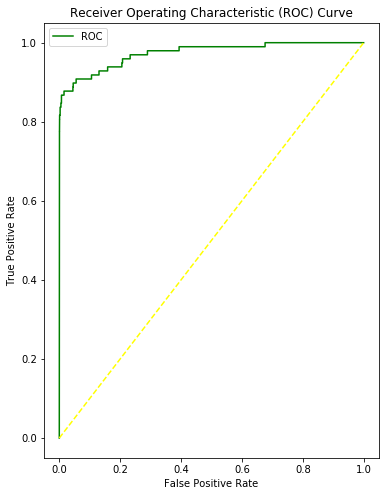

{'0': {'precision': 0.9998273414418908, 'recall': 0.9165201181767023, 'f1-score': 0.9563629690797321, 'support': 56864}, '1': {'precision': 0.018403639371381307, 'recall': 0.9081632653061225, 'f1-score': 0.03607620591811917, 'support': 98}, 'accuracy': 0.9165057406692181, 'macro avg': {'precision': 0.5091154904066361, 'recall': 0.9123416917414124, 'f1-score': 0.49621958749892564, 'support': 56962}, 'weighted avg': {'precision': 0.9981388557355793, 'recall': 0.9165057406692181, 'f1-score': 0.9547796661270647, 'support': 56962}}
AUC:  0.9734617433073398

C: 10
Coefficient of each feature: [[ 0.24938823 -0.92817567 -0.21532022  2.17044743 -0.12299918 -0.2086319
  -0.12573211 -1.27572011 -1.01390583 -2.20273555  1.10539697 -1.59652
  -0.13584096 -1.97386019 -0.28378184 -1.01155152 -1.22260632 -0.19507998
   0.35413638 -0.4149904   0.13589742  0.21756508 -0.32403119 -0.1091603
  -0.06722462 -0.3838431  -0.04372138  0.23704145 -0.46448674]]
Training accuracy: 0.8991385128079998
Test accuracy

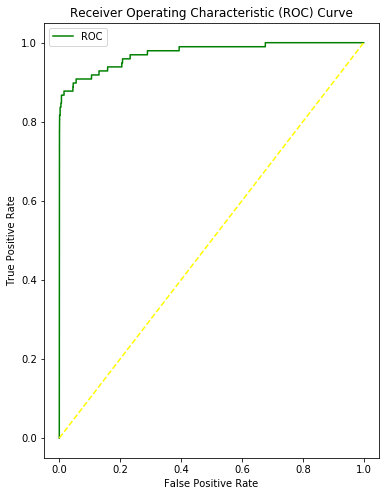

{'0': {'precision': 0.9998273414418908, 'recall': 0.9165201181767023, 'f1-score': 0.9563629690797321, 'support': 56864}, '1': {'precision': 0.018403639371381307, 'recall': 0.9081632653061225, 'f1-score': 0.03607620591811917, 'support': 98}, 'accuracy': 0.9165057406692181, 'macro avg': {'precision': 0.5091154904066361, 'recall': 0.9123416917414124, 'f1-score': 0.49621958749892564, 'support': 56962}, 'weighted avg': {'precision': 0.9981388557355793, 'recall': 0.9165057406692181, 'f1-score': 0.9547796661270647, 'support': 56962}}
AUC:  0.9734545654221172

C: 100
Coefficient of each feature: [[ 0.24949859 -0.92829713 -0.21531182  2.17062829 -0.12301954 -0.20864671
  -0.12581163 -1.27584998 -1.01405142 -2.20305186  1.10554567 -1.5967421
  -0.13583233 -1.9740611  -0.28380326 -1.01173134 -1.22289093 -0.19515699
   0.35421012 -0.41505412  0.13591889  0.21757288 -0.32405734 -0.10917493
  -0.06727107 -0.38384358 -0.0437538   0.23708892 -0.46450751]]
Training accuracy: 0.8991429092723632
Test acc

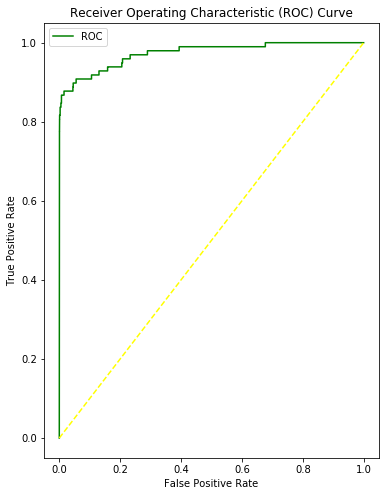

{'0': {'precision': 0.9998273414418908, 'recall': 0.9165201181767023, 'f1-score': 0.9563629690797321, 'support': 56864}, '1': {'precision': 0.018403639371381307, 'recall': 0.9081632653061225, 'f1-score': 0.03607620591811917, 'support': 98}, 'accuracy': 0.9165057406692181, 'macro avg': {'precision': 0.5091154904066361, 'recall': 0.9123416917414124, 'f1-score': 0.49621958749892564, 'support': 56962}, 'weighted avg': {'precision': 0.9981388557355793, 'recall': 0.9165057406692181, 'f1-score': 0.9547796661270647, 'support': 56962}}
AUC:  0.9734549243163781



In [59]:
for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_ada, y_ada)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_ada, y_ada))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('AUC: ', clf_score(clf))
  print('')

Here too we see precision and F1 score is less, and AUC is highest for C=0.01, at 0.9765

Train metrics
AUC Train: 0.98871
Train Accuracy:  0.9194715705852663
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    227451
           1       0.02      0.96      0.04       394

    accuracy                           0.92    227845
   macro avg       0.51      0.94      0.50    227845
weighted avg       1.00      0.92      0.96    227845

Train Confusion Matrix:
 [[209118  18333]
 [    15    379]]
Test metrics
AUC Test: 0.97652


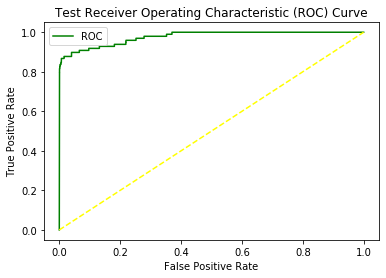

Test Accuracy:  0.9207541870018608
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962

Test Confusion Matrix:
 [[52359  4505]
 [    9    89]]


0.9765195224122287

In [112]:
# Logistic Regression with ADASYN
# Using the best parameters that we got from the cross validation on imbalanced data.

lsr_best = LogisticRegression(penalty='l2',C=0.001,random_state = 0)
lsr_ada = lsr_best.fit(X_ada,y_ada)

# Printing ROC curve and accuracy scores
clf_score(lsr_ada)

AUC is better with SMOTE, and Recall is better with ADASYN, but f1 score is very low.
SO looks like model is overfitting.

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost
- KNN
- SVM - SVM is not tried since it takes too long

### Decision Tree

In [61]:
# Decision Tree with Random Oversampling
# 5 fold cross validation for getting best parameter

depth_score_ros=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_ros, y=y_ros, cv=5, n_jobs=-1)
  depth_score_ros.append(score_tree.mean())
print(depth_score_ros)

[0.9242078503878812, 0.92840435899969, 0.9462169877946176, 0.9550232806079013, 0.9683030628202858, 0.9758695277531185, 0.9864058625252838, 0.9928731904191505, 0.9963992247333502, 0.9970894834540243, 0.9975928886942009, 0.9978522849142969, 0.9983425016988743, 0.9988283194482502, 0.9989865951227127, 0.9990745261012938, 0.9990921124081552, 0.9991646556309945, 0.9992855604063966]


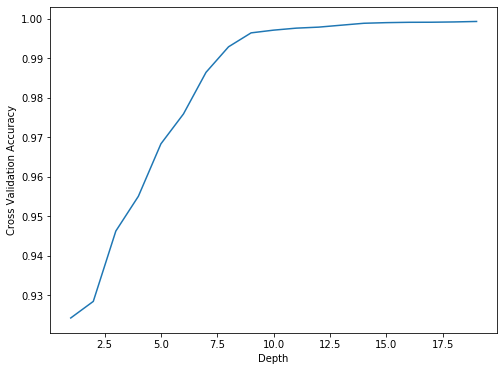

In [62]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score_ros,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

Train metrics
AUC Train: 0.99947
Train Accuracy:  0.9930435164256403
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.20      1.00      0.33       394

    accuracy                           0.99    227845
   macro avg       0.60      1.00      0.66    227845
weighted avg       1.00      0.99      1.00    227845

Train Confusion Matrix:
 [[225866   1585]
 [     0    394]]
Test metrics
AUC Test: 0.91222


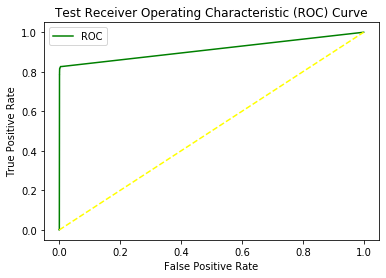

Test Accuracy:  0.9919771075453812
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.83      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Test Confusion Matrix:
 [[56424   440]
 [   17    81]]


0.9122199368633216

In [113]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 9)
dt_clf = dt.fit(X_ros,y_ros)
#Plotting ROC
clf_score(dt_clf)

Train metrics
AUC Train: 0.99928
Train Accuracy:  0.9886414009524018
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.13      1.00      0.23       394

    accuracy                           0.99    227845
   macro avg       0.57      0.99      0.61    227845
weighted avg       1.00      0.99      0.99    227845

Train Confusion Matrix:
 [[224864   2587]
 [     1    393]]
Test metrics
AUC Test: 0.91396


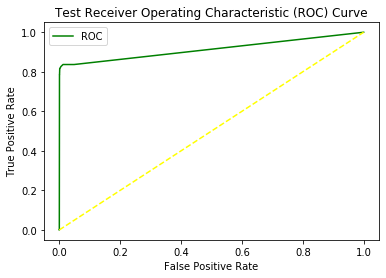

Test Accuracy:  0.9875004388890839
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.84      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Test Confusion Matrix:
 [[56168   696]
 [   16    82]]


0.9139579720464438

In [114]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 8)
dt_clf = dt.fit(X_ros,y_ros)
#Plotting ROC
clf_score(dt_clf)

We will go ahead with max_depth as 8, since it has higher AUC

In [65]:
# Decision Tree with SMOTE
# 5 fold cross validation for getting best parameter

depth_score_sm=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_sm, y=y_sm, cv=5, n_jobs=-1)
  depth_score_sm.append(score_tree.mean())
print(depth_score_sm)

[0.9237264268171395, 0.9237264268171395, 0.9396661273533207, 0.9428668143744507, 0.9520270307646314, 0.96810082102832, 0.9763267677447838, 0.9812487073043974, 0.9846604316508835, 0.9870895266074037, 0.9905078448917448, 0.9927434934688799, 0.9945218981159393, 0.9957968973778497, 0.9963772414208973, 0.9968322844802986, 0.9971554314825827, 0.9973203022305157, 0.997513750252919]


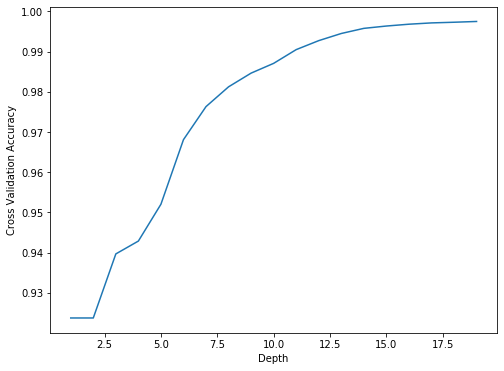

In [66]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score_sm,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

We see that accuracy increases with dept increase, but we will not take too much depth. Accuracy slows down at depth of 10/11, so we take depth of 10 and see.

In [115]:
#Fitting the model with depth=10 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 10)
dt_clf = dt.fit(X_sm,y_sm)

Train metrics
AUC Train: 0.99913
Train Accuracy:  0.9867497640940113
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.11      0.99      0.21       394

    accuracy                           0.99    227845
   macro avg       0.56      0.99      0.60    227845
weighted avg       1.00      0.99      0.99    227845

Train Confusion Matrix:
 [[224435   3016]
 [     3    391]]
Test metrics
AUC Test: 0.88946


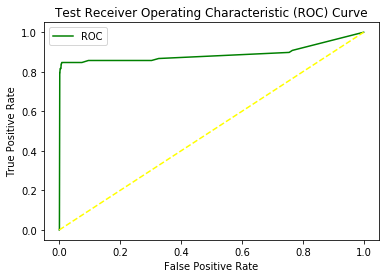

Test Accuracy:  0.985060215582318
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Test Confusion Matrix:
 [[56028   836]
 [   15    83]]


0.8894550047086927

In [116]:
#Plotting ROC
clf_score(dt_clf)

For depth of 10, the precision and f1-score is very low.
Will try once with depth of 5, and once with depth of 12.

Train metrics
AUC Train: 0.98803
Train Accuracy:  0.944163795562773
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    227451
           1       0.03      0.96      0.06       394

    accuracy                           0.94    227845
   macro avg       0.51      0.95      0.51    227845
weighted avg       1.00      0.94      0.97    227845

Train Confusion Matrix:
 [[214745  12706]
 [    16    378]]
Test metrics
AUC Test: 0.95120


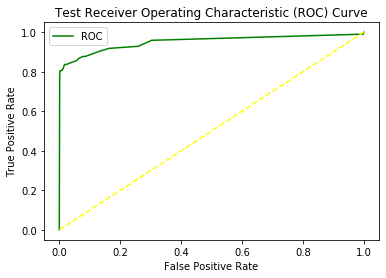

Test Accuracy:  0.9427513078894701
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.86      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

Test Confusion Matrix:
 [[53617  3247]
 [   14    84]]


0.9511964816877793

In [123]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_sm,y_sm)
#Plotting ROC
clf_score(dt_clf)

Train metrics
AUC Train: 0.99949
Train Accuracy:  0.9921920603919331
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.18      1.00      0.31       394

    accuracy                           0.99    227845
   macro avg       0.59      1.00      0.65    227845
weighted avg       1.00      0.99      0.99    227845

Train Confusion Matrix:
 [[225672   1779]
 [     0    394]]
Test metrics
AUC Test: 0.87269


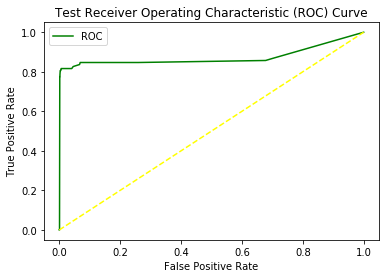

Test Accuracy:  0.9882904392401952
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.82      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Test Confusion Matrix:
 [[56215   649]
 [   18    80]]


0.8726868367634053

In [122]:
#Fitting the model with depth=12 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 12)
dt_clf = dt.fit(X_sm,y_sm)
#Plotting ROC
clf_score(dt_clf)

We take Max_depth as 5, since AUC is better.

In [71]:
# Decision Tree with ADASYN
# 5 fold cross validation for getting best parameter

depth_score_ada=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_ada, y=y_ada, cv=5, n_jobs=-1)
  depth_score_ada.append(score_tree.mean())
print(depth_score_ada)

[0.7910382605485012, 0.844584971801979, 0.860774908089016, 0.8792928258406831, 0.8924030968709319, 0.8971270747750602, 0.9076653893393838, 0.9152954552040111, 0.9097031391292074, 0.9211295638443664, 0.921646139588319, 0.9226749083739463, 0.9221231508351317, 0.9207338591953841, 0.920034828909482, 0.9188741583406379, 0.9211669183139419, 0.9190829878610002, 0.9186807158995098]


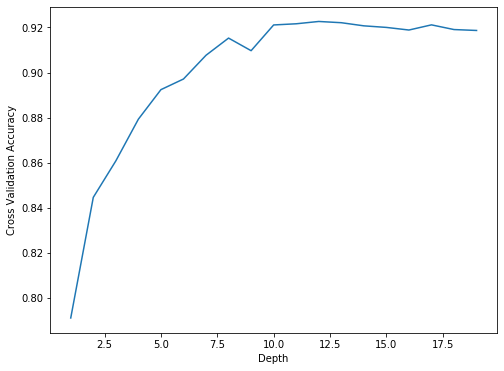

In [72]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score_ada,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

With ADASYN we see that the accuracy is not very high. But will take depth as 8, as after that not much increase is there.

Train metrics
AUC Train: 0.99356
Train Accuracy:  0.9484210757313085
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    227451
           1       0.03      1.00      0.06       394

    accuracy                           0.95    227845
   macro avg       0.52      0.97      0.52    227845
weighted avg       1.00      0.95      0.97    227845

Train Confusion Matrix:
 [[215700  11751]
 [     1    393]]
Test metrics
AUC Test: 0.91694


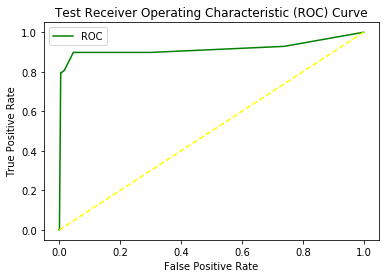

Test Accuracy:  0.9460868649274955
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.90      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.95      0.97     56962

Test Confusion Matrix:
 [[53803  3061]
 [   10    88]]


0.9169371533081436

In [118]:
#Fitting the model with depth=8 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 8)
dt_clf = dt.fit(X_ada,y_ada)
#Plotting ROC
clf_score(dt_clf)

### Random Forest

In [75]:
# Randowm Forest using Rnadom Oversampling balanced data
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_ros,y_ros)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 50}
accuracy : 0.9999141048884763


Train metrics
AUC Train: 0.99989
Train Accuracy:  0.9995084377537361
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.79      0.97      0.87       394

    accuracy                           1.00    227845
   macro avg       0.90      0.99      0.94    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227350    101]
 [    11    383]]
Test metrics
AUC Test: 0.97577


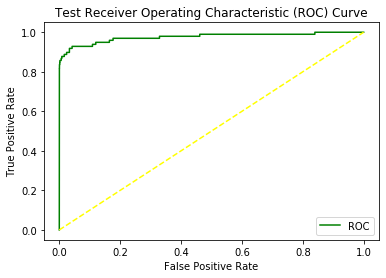

Test Accuracy:  0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.83      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56833    31]
 [   17    81]]


0.9757692539593215

In [119]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_ros,y_ros)

#Plotting ROC
clf_score(RFC_clf)

#### Random Forest using SMOTE balanced data

In [77]:
# Randowm Forest using SMOTE balanced data
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_sm,y_sm)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 40}
accuracy : 0.9991090626551916


Train metrics
AUC Train: 0.99955
Train Accuracy:  0.998288310035331
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.50      0.98      0.66       394

    accuracy                           1.00    227845
   macro avg       0.75      0.99      0.83    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227068    383]
 [     7    387]]
Test metrics
AUC Test: 0.98335


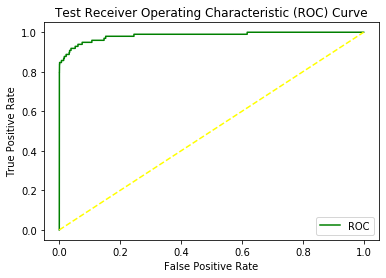

Test Accuracy:  0.9975948878199501
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.85      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.92      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56742   122]
 [   15    83]]


0.9833538561034993

In [120]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=40)
RFC_clf = rf.fit(X_sm,y_sm)

#Plotting ROC
clf_score(RFC_clf)

#### Random Forest using ADASYN balanced data

In [79]:
# Random Forest using ADASYN balanced data
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_ada,y_ada)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 40}
accuracy : 0.9889948254407827


Train metrics
AUC Train: 0.99972
Train Accuracy:  0.9788321007702605
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.08      1.00      0.14       394

    accuracy                           0.98    227845
   macro avg       0.54      0.99      0.56    227845
weighted avg       1.00      0.98      0.99    227845

Train Confusion Matrix:
 [[222628   4823]
 [     0    394]]
Test metrics
AUC Test: 0.98272


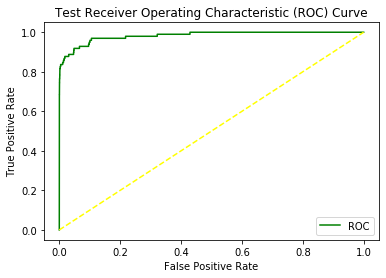

Test Accuracy:  0.9774937677750078
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Test Confusion Matrix:
 [[55594  1270]
 [   12    86]]


0.9827223816510284

In [121]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=40)
RFC_clf = rf.fit(X_ada,y_ada)

#Plotting ROC
clf_score(RFC_clf)

### XGBoost

In [81]:
# Using grid search cv to find the best parameters.
# XGBoost with Random Sampling data

xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_ros,y_ros)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 150}
accuracy : 0.9999953089515631


Train metrics
AUC Train: 1.00000
Train Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [     0    394]]
Test metrics
AUC Test: 0.97033


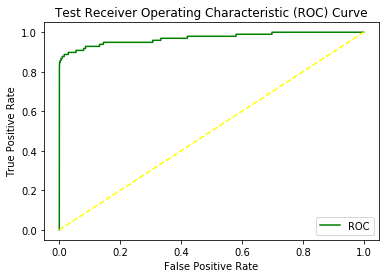

Test Accuracy:  0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56856     8]
 [   20    78]]


0.9703280580662202

In [100]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=150,max_depth=7,min_child_weight=3)

xgb_clf = xgbst.fit(X_ros,y_ros)

#Plotting ROC
clf_score(xgb_clf)

In [83]:
# Using grid search cv to find the best parameters.
# XGBoost with SMOTE data

xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_sm,y_sm)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 140}
accuracy : 0.9999926926332532


Train metrics
AUC Train: 1.00000
Train Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [     0    394]]
Test metrics
AUC Test: 0.98555


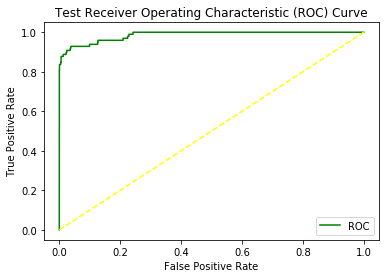

Test Accuracy:  0.9986657771847899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.84      0.68        98

    accuracy                           1.00     56962
   macro avg       0.79      0.92      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56804    60]
 [   16    82]]


0.9855518142822689

In [101]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=140,max_depth=7,min_child_weight=3)

xgb_clf = xgbst.fit(X_sm,y_sm)

#Plotting ROC
clf_score(xgb_clf)

In [85]:
# Using grid search cv to find the best parameters.
# XGBoost with ADASYN Balanced data

xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_ada,y_ada)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 150}
accuracy : 0.9981207838909328


Train metrics
AUC Train: 1.00000
Train Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [     0    394]]
Test metrics
AUC Test: 0.98063


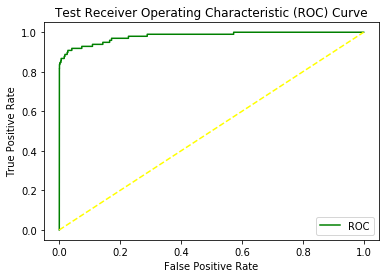

Test Accuracy:  0.9984199992977775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.84      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56790    74]
 [   16    82]]


0.9806274261252053

In [99]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=150,max_depth=7,min_child_weight=3)
xgb_clf = xgbst.fit(X_ada,y_ada)

#Plotting ROC
clf_score(xgb_clf)

### KNN

In [87]:
# Finding the best k with stratified K-fold method with SMOTE balanced data 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.
# We take only odd integers as K values so that majority rule is appalied. 
# We reduce K-range here as it takes too long, and we have seen K mostly to be around 3, or 5
k_range = np.arange(1, 8, 2) 
scores = [] #to store cross val score for each k
k_range
for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_sm,y_sm)
  score = cross_val_score(knn_clf, X_sm,y_sm, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

In [90]:
print(mse) # we need to take the last 10 elements as the previous 10 mse is for unbalance data
print(scores) # we need to take the last 10 elements as the previous 10 scores is for unbalance data
print(k_range)

[0.0004088792750965853, 0.0007913792421224697, 0.001173879209148243, 0.0015058188357053304]
[0.9995911207249034, 0.9992086207578775, 0.9988261207908518, 0.9984941811642947]
[1 3 5 7]


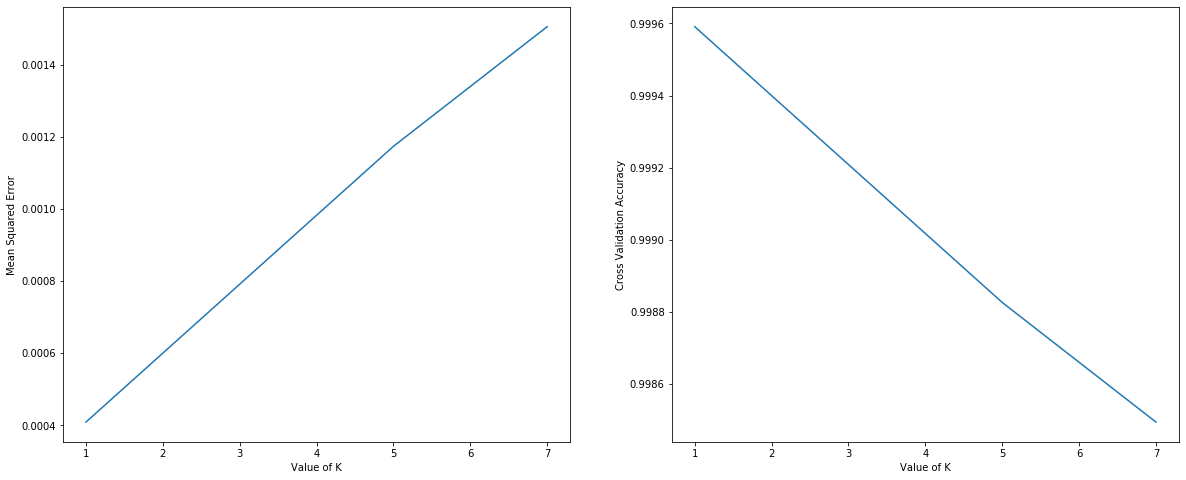

In [91]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

So we see with SMOTE balaning technique, mean square increases with more K value, and accuracy decreases with K. So we take the minimum K possible, which is 3.

Train metrics
AUC Train: 1.00
Train Accuracy:  0.9994074919353069
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.74      1.00      0.85       394

    accuracy                           1.00    227845
   macro avg       0.87      1.00      0.93    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227316    135]
 [     0    394]]
Test metrics
AUC Test: 0.92


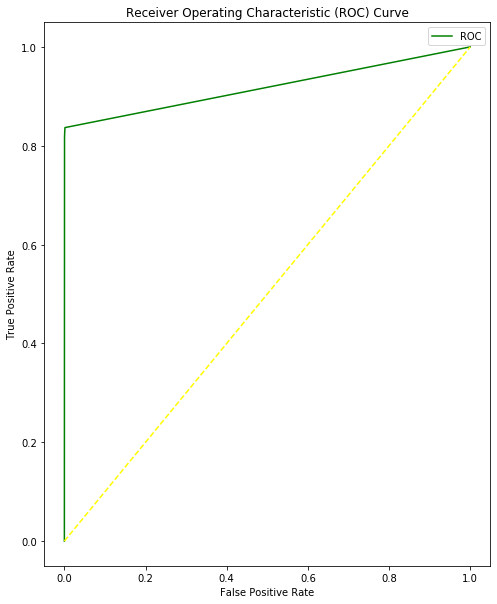

Test Accuracy:  0.9989291106351603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56820    44]
 [   17    81]]


0.9180668627186384

In [92]:
# KNN with SMOTE re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(X_sm,y_sm)

#Printing ROC 

clf_score(knn_sm)

With SMOTE Balancing and KNN of 3, AUC is 0.918, Precision is 0.65, recall 0.83 and f1-score is 0.73

In [93]:
# Finding the best k with stratified K-fold method with ADASYN balanced data 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.
scores_ada = []
for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_ada,y_ada)
  score = cross_val_score(knn_clf, X_ada,y_ada, cv=3, n_jobs = -1)
  scores_ada.append(score.mean())

#Storing the mean squared error to decide optimum k
mse_ada = [1-x for x in scores]

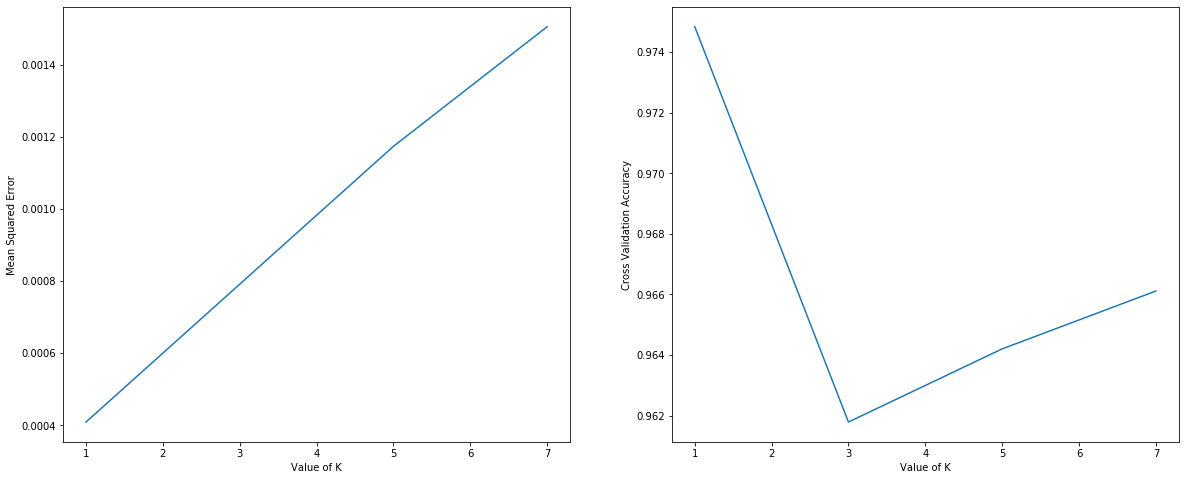

In [94]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse_ada,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores_ada,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

We see that at K=3 the Cross validation Accuracy is less, so we try the next K value of 5, where accuracy increases.

Train metrics
AUC Train: 1.00000
Train Accuracy:  0.9988720402027694
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.61      1.00      0.75       394

    accuracy                           1.00    227845
   macro avg       0.80      1.00      0.88    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227194    257]
 [     0    394]]
Test metrics
AUC Test: 0.92305


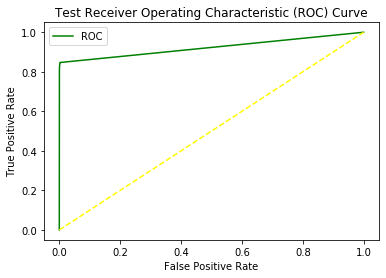

Test Accuracy:  0.9981917769741231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.84      0.61        98

    accuracy                           1.00     56962
   macro avg       0.74      0.92      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56777    87]
 [   16    82]]


0.9230472383804394

In [98]:
# KNN with ADASYN re-sampled data
# Did not run it as it will take time

knn = KNeighborsClassifier(n_neighbors=5)

knn_ada = knn.fit(X_ada,y_ada)

#Printing ROC 

clf_score(knn_ada)

### Model Analysis

**Below is the list of all the models with their various metrics.**

| Model | Balancing | Hyperparameters | Train Accuracy | Train Precision | Train Recall | Train F1-score | Train AUC | Test Accuracy | Test Precision | Test Recall | Test F1-Score | Test AUC |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | None | C=0.01 | 0.99923 | 0.9 | 0.62 | 0.74 | 0.98433 | 0.99921 | 0.88 | 0.62 | 0.73 | 0.975735 |
| Logistic Regression | Random Oversampling | C=0.001 | 0.97828 | 0.07 | 0.92 | 0.13 | 0.98773 | 0.97802 | 0.06 | 0.88 | 0.12 | 0.979245 |
| Logistic Regression | SMOTE | C=0.001 | 0.97503 | 0.06 | 0.93 | 0.11 | 0.98771 | 0.97526 | 0.06 | 0.88 | 0.11 | 0.979259 |
| Logistic Regression | ADASYN | C=0.001 | 0.91947 | 0.02 | 0.96 | 0.04 | 0.98871 | 0.92075 | 0.02 | 0.91 | 0.04 | 0.976520 |
| KNN | None | n_neighbors=3 | 0.9995 | 0.98 | 0.82 | 0.89 | 0.99996 | 0.99951 | 0.96 | 0.74 | 0.84 | 0.902998 |
| KNN | SMOTE | n_neighbors=3 | 0.993 | 0.74 | 1 | 0.85 | 1 | 0.99893 | 0.65 | 0.83 | 0.73 | 0.918067 |
| KNN | ADASYN | KNN = 5 | 0.99887 | 0.61 | 1 | 0.75 | 1 | 0.99819 | 0.49 | 0.84 | 0.61 | 0.923047 |
| Decision Tree | None | max_depth = 5 | 0.9996 | 0.95 | 0.81 | 0.87 | 0.92631 | 0.99935 | 0.89 | 0.71 | 0.79 | 0.872263 |
| Decision Tree | Random Oversampling | max_depth = 8 | 0.98864 | 0.13 | 1 | 0.23 | 0.99928 | 0.9875 | 0.11 | 0.84 | 0.19 | 0.913958 |
| Decision Tree | SMOTE | max_depth = 5 | 0.94416 | 0.03 | 0.96 | 0.06 | 0.98803 | 0.94275 | 0.03 | 0.86 | 0.05 | 0.951196 |
| Decision Tree | ADASYN | max_depth = 8 | 0.94842 | 0.03 | 1 | 0.06 | 0.99356 | 0.94609 | 0.03 | 0.9 | 0.05 | 0.916937 |
| Random Forest | None | max_depth=7, n_estimators=50 | 0.99964 | 0.98 | 0.81 | 0.89 | 0.98235 | 0.99939 | 0.94 | 0.68 | 0.79 | 0.965751 |
| Random Forest | Random Oversampling | max_depth=9, n_estimators=50 | 0.99951 | 0.79 | 0.97 | 0.87 | 0.99989 | 0.99916 | 0.72 | 0.83 | 0.77 | 0.975769 |
| Random Forest | SMOTE | max_depth=9, n_estimators=40 | 0.99829 | 0.5 | 0.98 | 0.66 | 0.99955 | 0.99759 | 0.4 | 0.85 | 0.55 | 0.983354 |
| Random Forest | ADASYN | max_depth=9, n_estimators=40 | 0.97883 | 0.08 | 1 | 0.14 | 0.99972 | 0.97749 | 0.06 | 0.88 | 0.12 | 0.982722 |
| XGBoost | None | n_estimators=130,max_depth=3,min_child_weight=3 | 0.99992 | 1 | 0.95 | 0.98 | 1 | 0.99951 | 0.95 | 0.76 | 0.84 | 0.976296 |
| XGBoost | Random Oversampling | n_estimators=150,max_depth=5,min_child_weight=3 | 1 | 1 | 1 | 1 | 1 | 0.99951 | 0.91 | 0.8 | 0.85 | 0.970328 |
| XGBoost | SMOTE | n_estimators=140,max_depth=7,min_child_weight=3 | 0.99999 | 1 | 1 | 1 | 1 | 0.99867 | 0.58 | 0.84 | 0.68 | 0.985552 |
| XGBoost | ADASYN | n_estimators=150,max_depth=7,min_child_weight=3 | 0.99784 | 1 | 1 | 1 | 1 | 0.99842 | 0.53 | 0.84 | 0.65 | 0.980627 |


### Final Model

When we go through all of them, we concentrate mainly on the highef AUC score, higher recall, and good enough precision.
So based on these parameters we identify narrow down to 2 models, Random Forest with SMOTE, or ADASYN, and XGBoost with SMOTE balanced as the best model.
Random Forest with ADASYN has very less precision, so we do not take that.
Random Forest with SMOTE looks good, but XGBoost with SMOTE has better precision, but slightly less Recall.

For now we can go ahead with **XGBoost with SMOTE** with hyperparameters as => n_estimators=140,max_depth=7,min_child_weight=3, but based on the customer's requirement, and model, we can go with the other too.


Train metrics
AUC Train: 1.00000
Train Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Train Confusion Matrix:
 [[227451      0]
 [     0    394]]
Test metrics
AUC Test: 0.98555


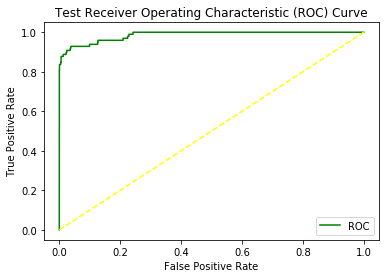

Test Accuracy:  0.9986657771847899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.84      0.68        98

    accuracy                           1.00     56962
   macro avg       0.79      0.92      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion Matrix:
 [[56804    60]
 [   16    82]]


0.9855518142822689

In [29]:
# Final MOdel with XGBoost on SMOTE balanced data
clf = XGBClassifier(n_estimators=140,max_depth=7,min_child_weight=3)
final_clf = clf.fit(X_sm,y_sm)
clf_score(final_clf)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


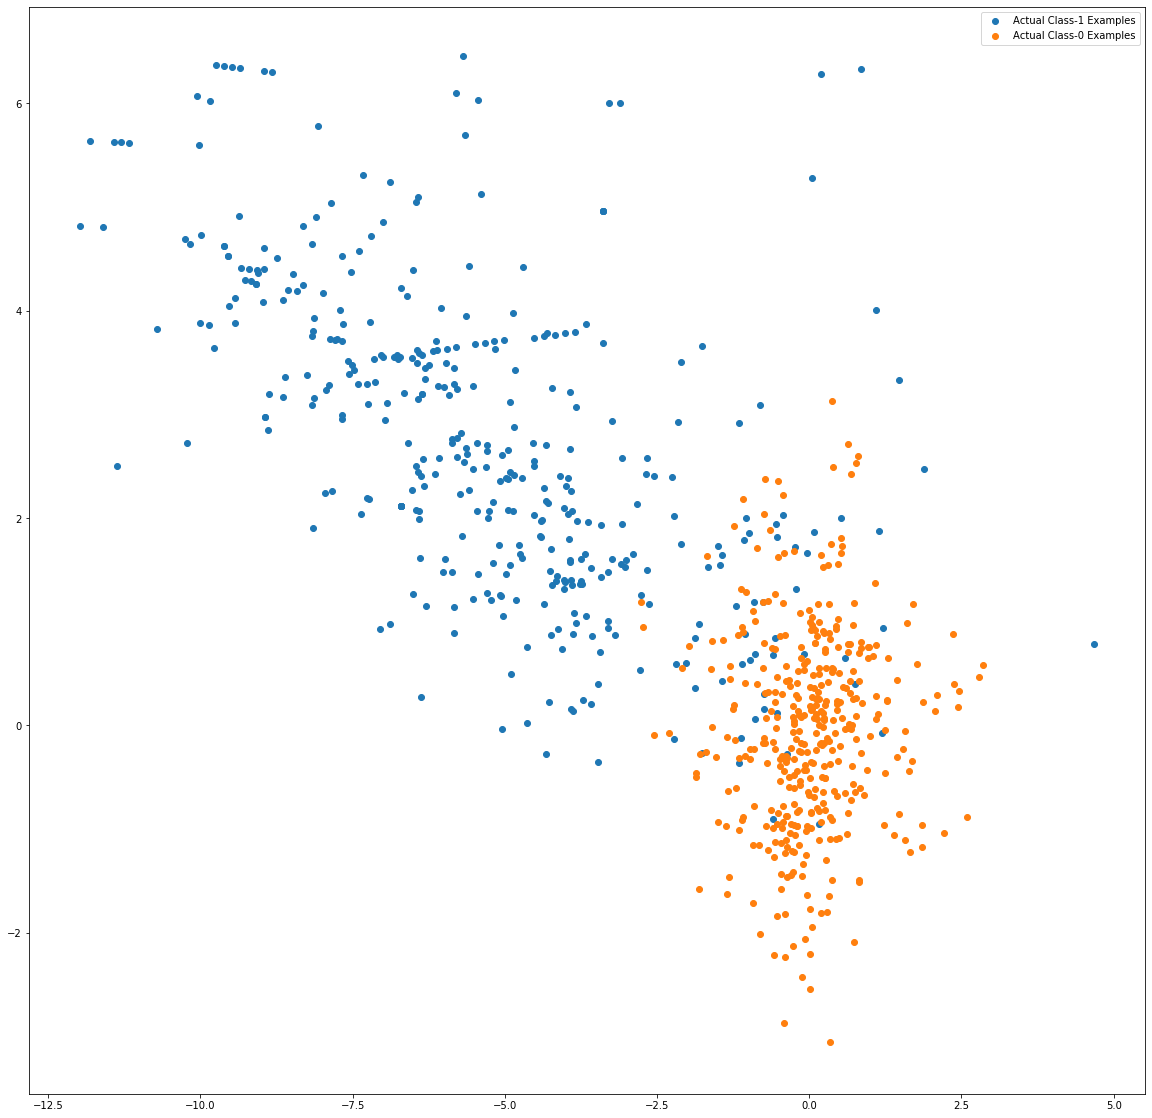

In [30]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [31]:
prob = final_clf.predict_proba(X_test)
prob = prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob, pos_label=1 )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.00034915173


### Cost Benefit Analysis

In [32]:
# predictions on test subset
y_pred = final_clf.predict(X_test)
# Computing confusion matrix
cm = confusion_matrix(y_test,y_pred)
TP = cm[1,1] # true positives
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [33]:
# create predictions dataframe. column 1 is Class-->
test_predictions = pd.DataFrame(y_test)
test_predictions.rename(columns={'Class':'Actual'}, inplace=True)
test_predictions.head()

,Actual
159949,0
15295,0
260353,0
209407,0
91229,0


In [34]:
# add predicted columns with the predicted values
test_predictions['Predicted'] = y_pred
test_predictions.head()

,Actual,Predicted
159949,0,0
15295,0,0
260353,0,0
209407,0,0
91229,0,0


In [35]:
# Merge with transaction amount from original dataframe by merging based on index values
test_predictions = test_predictions.merge(pd.DataFrame(df['Amount']),left_index = True, right_index = True)
test_predictions

,Actual,Predicted,Amount
159949,0,0,0.89
15295,0,0,85.00
260353,0,0,42.70
209407,0,0,29.99
91229,0,0,68.00
...,...,...,...
207242,0,0,42.42
239361,0,0,7.99
211932,0,0,1.00
70523,0,0,30.00


In [36]:
# Computing transaction cost for all True positive cases
trnx_cost_TP= test_predictions.query('Actual==1 & Predicted==1')['Amount'].sum()
trnx_cost_TP

7060.9400000000005

In [37]:
# Computing transaction cost for all False negative cases
trnx_cost_FN= test_predictions.query('Actual==1 & Predicted==0')['Amount'].sum()
trnx_cost_FN

2908.26

In [38]:
# Assuming 10 units as the cost of each verification call
call_verification_cost = (TP + FP) * 10
call_verification_cost

1420

### Total Savings(Cost Benefit Analysis)

In [39]:
total_savings = trnx_cost_TP - (trnx_cost_FN + call_verification_cost)
print("Total Savings (( Cost Benefit Analysis) is ", round(total_savings,2), "amount units on Test Subset")

Total Savings (( Cost Benefit Analysis) is  2732.68 amount units on Test Subset
